## __Lending Club Case Study__

__Objective__

The Objective of this case study is to help a consumer finance company understand the consumer and loan attributes that influence the tendency of default by using Exploratory Data Analysis (EDA) techniques.

The Lending company wants to analyse the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

__Learnings from the Case Study__
- Identification of risky loan applicants will help the lending company in risk assessment and portfolio management thereby cutting down the amount of credit loss.
- EDA is a powerful tool to get a basic understanding of the data trends.
- Understanding of Risk analytics domain to identify logical variables that are indicators of default.
bankruptcies
rivers.



__Data Undertanding__

Lending Company’s historical data is provided with customer and loan attributes. The data consists of 39717 rows and 111 columns. This is a rich dataset which is used to analyse the driving factors of a loan default.

__Dataset Attributes__


Primary Attribute-Loan Status


The primary field on interest is the **loan status** which indicates a defaulted loan. It has 3 distinct values:
Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
Current: Applicant is in the process of paying the installments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
Charged-off: Applicant has not paid the installments in due time for a long period of time, i.e. he/she has defaulted on the loan 
For the purpose of case study, Current loan status is removed from the analysis and this is an inconclusive category and hence not useable in identify default risk drivers.

Some of the key risk drivers that represent customer & loan attributes that could drive default risk based on our domain understanding are summarized below:

**Customer Attributes**
- Annual Income (annual_inc): Self-reported annual income provided by the borrower.
- Home Ownership (home_ownership): The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER.
- Employment Length (emp_length): Employment length in years. 
- State (addr_state): The state provided by the borrower in the loan application

**Loan Characteristics**
- Loan Amount(loan_amnt): The listed amount of the loan applied for by the borrower.
- Grade(grade): LC assigned loan grade
- Term(term): The number of payments on the loan.
- Purpose of Loan(purpose): Purpose of loan provided by the borrower on loan request
- Verification Status(verification_status): Indicates if income was verified by LC, not verified, or if the income source was verified
- Interest Rate(int_rate): Interest Rate on the loan
- Installments(installment): Monthly payment owed by the borrower if the loan originates
- Public Records of Bankruptcy(pub_rec_bankruptcies): Number of public record bankruptcies



### __1. Data Cleaning and Pre-Processing__

#### __1.1. Importing the Data__

__Loading Libraries__

In [2479]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

__Loading Data & Exploration__

In [2482]:
loan_df = pd.read_csv('loan.csv')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2483]:
loan_df.shape

(39717, 111)

#### __1.2. Removing null value empty columns__

__Checking for null values__

In [2488]:
loan_df.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [2490]:
loan_df.columns[loan_df.isnull().all()].tolist()

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

__There are a lot of empty columns in the dataset. As they do not add any value to our analysis, removing them from the dataset to get a cleaner dataset.__

In [2493]:
loan_df.dropna(axis=1,how ='all',inplace=True)

In [2495]:
loan_df.shape

(39717, 57)

#### __1.3. Removing columns with just one value__

__Number of Unique Observations in each column__

In [2499]:
loan_df.nunique().sort_values(ascending= False)

id                            39717
member_id                     39717
url                           39717
total_pymnt                   37850
total_pymnt_inv               37518
total_rec_int                 35148
last_pymnt_amnt               34930
emp_title                     28820
desc                          26526
revol_bal                     21711
title                         19615
installment                   15383
funded_amnt_inv                8205
total_rec_prncp                7976
annual_inc                     5318
recoveries                     4040
dti                            2868
collection_recovery_fee        2616
total_rec_late_fee             1356
out_prncp_inv                  1138
out_prncp                      1137
revol_util                     1089
funded_amnt                    1041
loan_amnt                       885
zip_code                        823
earliest_cr_line                526
int_rate                        371
mths_since_last_record      

__There are few columns with only 1 unique value. They will not add any additional information in our analysis ( to identify defaults/ non-defaults) , hence they are removed from the data to get a cleaner dataset.__

In [2502]:
columns_with_1_unique_value=loan_df.columns[loan_df.nunique()==1].to_list()

In [2504]:
loan_df.drop(columns_with_1_unique_value, axis = 1, inplace = True)

In [2506]:
loan_df.shape

(39717, 48)

#### __1.4. Checking Duplicate Rows__

In [2509]:
loan_df[loan_df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


__There are no duplicate rows__

#### __1.5. Removing the Loan_Status = 'Current' Observations__

In [2513]:
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

__For the Loan_Status = 'Current',  tenure of the loans is not yet completed. Since, we are analyzing the driving factors behind the loan default. This data is not included in the analysis.__

In [2516]:
loan_df=loan_df[loan_df.loan_status != 'Current']

In [2518]:
loan_df.shape

(38577, 48)

#### __1.6. Removing other Unintuitive Columns__

Removing the list of variables mentioned below as they are not useful for identifying driving variables for default.The variables included in the list are:

- Unuseful Post loan features 
- Payment Amounts which are more appropriate for Loss Estimation rather than serving as default risk drivers
- User IDs
- Text Columns
- Other unituitive variables

In [2522]:
# List the columns not required for the analysis. Total 19 columns
drop_cols = [
'collection_recovery_fee',
'emp_title',
'id',
'inq_last_6mths',
'last_pymnt_amnt',
'last_pymnt_d',
'member_id',
'next_pymnt_d',
'out_prncp',
'out_prncp_inv',
'recoveries',
'total_pymnt',
'total_pymnt_inv',
'total_rec_int',
'total_rec_late_fee',
'total_rec_prncp',
'url',
'zip_code',
'desc',
'title',
'last_credit_pull_d',
'earliest_cr_line',
'delinq_2yrs',
'pub_rec'
]

loan_df.drop(drop_cols, axis = 1, inplace = True)

#### __1.7. Missing Value Treatment and Other Imputations__

__Missing Value Identication and Treatment__

In [2526]:
(loan_df.isnull().sum() / len(loan_df))*100

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
addr_state                 0.000000
dti                        0.000000
mths_since_last_delinq    64.559193
mths_since_last_record    92.897322
open_acc                   0.000000
revol_bal                  0.000000
revol_util                 0.129611
total_acc                  0.000000
pub_rec_bankruptcies       1.806776
dtype: float64

__Dropping the columns with high missing percentage (>=65 %) .__

In [2529]:
high_missing_columns=loan_df.columns[round((loan_df.isnull().sum() / len(loan_df))*100) >= 65].to_list()
loan_df.drop(high_missing_columns,axis=1,inplace=True)

In [2531]:
loan_df.shape

(38577, 22)

__Missing Value Imputation for remaining columns (with low missing percentage)__

In [2534]:
#Checking the Data Types
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

In [2536]:
loan_df.pub_rec_bankruptcies.describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [2538]:
loan_df.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [2540]:
#Removing the % sign from revol_util and converting t string
loan_df.revol_util=loan_df.revol_util.apply(lambda x: x[:-1] if isinstance(x, str) else x).astype('float')

In [2542]:
loan_df.revol_util.describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

Analysing the variables with missing values. Following values will be used for missing value imputation:
- pub_rec_bankruptcies-median 
(as most of the distribution is concentrated around 0 , median is a more appropriate metric. Mean might be influenced by extreme values)
- emp_length-mode
(categorical variable substitution with mode. Also, 10+ year count is much higher than other observations count)
- revol_util-mean
(As the distribution looks even , for revol_util mean substitution can be done)

In [2545]:
loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.median(),inplace=True)
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0],inplace=True)
loan_df.revol_util.fillna(loan_df.revol_util.mean(),inplace=True)



__Other Imputations__

Home Ownership has only 3 values of None . Therefore, combining it with other.

In [2549]:
loan_df.home_ownership.value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [2551]:
loan_df.home_ownership.replace('NONE','OTHER',inplace=True)

#### __1.8. Standardize the Data__

Convert Data to correct data types:
- convert term to float
- convert int_rate to float
- revol_util was already converted to float post removal of % sign (during missing value imputation)
- issue_d to datetime


In [2555]:
loan_df.term = loan_df.term.apply(lambda x:x.replace(' months','')).astype('float')
loan_df.int_rate=loan_df.int_rate.apply(lambda x:x.replace('%','')).astype('float')
loan_df.issue_d=pd.to_datetime(loan_df.issue_d,format='%b-%y')

#### __1.9. Outlier Treatment__

Analyzing the below columns for potential outliers:
- loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_bal

Text(0, 0.5, 'Values')

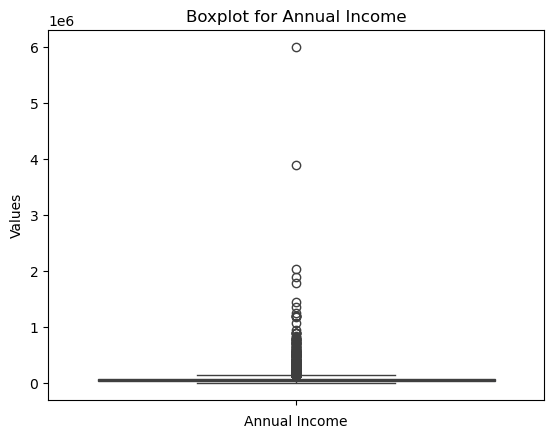

In [2559]:
#Boxplot for Annual Income
sns.boxplot(loan_df.annual_inc)
plt.title('Boxplot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Values')

__There are clearly outliers at the upper end of the annual income. Hence, removing the outliers .
Removing the observations greater than Q3+1.5*IQR (categorising them as outliers).__

In [2562]:
Q1=np.quantile(loan_df.annual_inc,0.25)
Q3=np.quantile(loan_df.annual_inc,0.75)
IQR= (Q3-Q1)
UL= Q3+ (1.5*IQR)

In [2564]:
loan_df=loan_df[loan_df.annual_inc <UL]

Text(0, 0.5, 'Values')

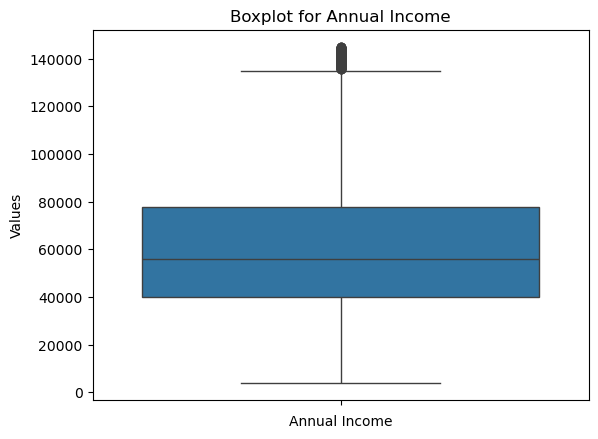

In [2566]:
sns.boxplot(loan_df.annual_inc)
plt.title('Boxplot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

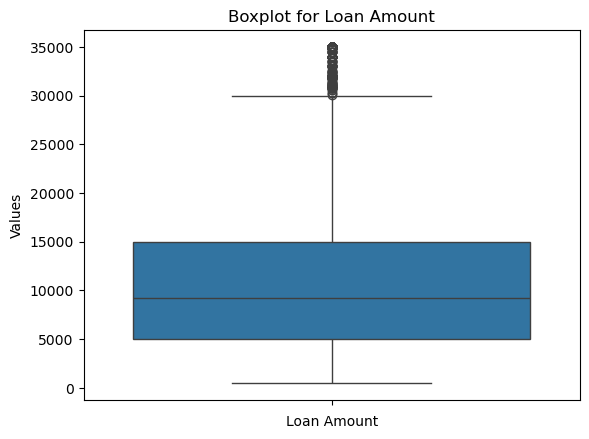

In [2567]:
sns.boxplot(loan_df.loan_amnt)
plt.title('Boxplot for Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

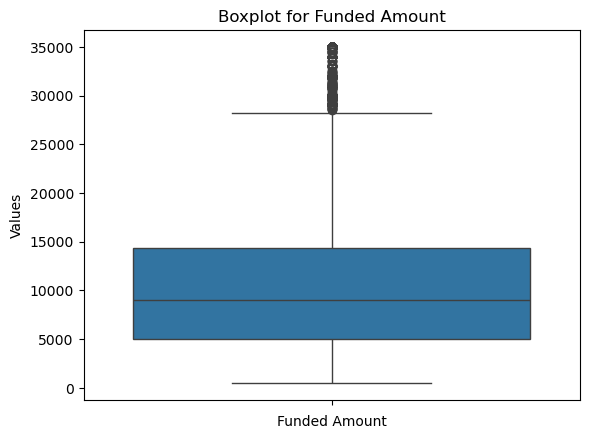

In [2568]:
sns.boxplot(loan_df.funded_amnt)
plt.title('Boxplot for Funded Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

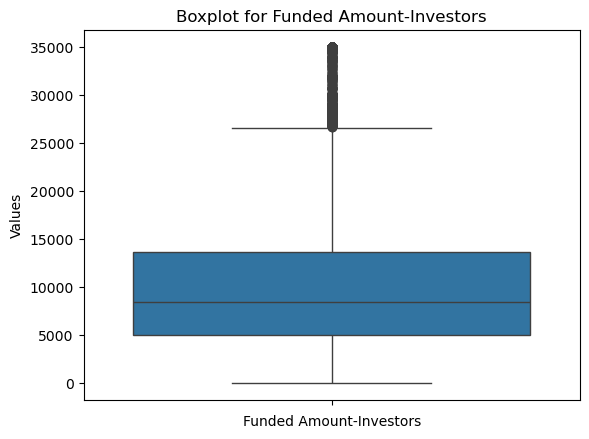

In [2570]:
sns.boxplot(loan_df.funded_amnt_inv)
plt.title('Boxplot for Funded Amount-Investors')
plt.xlabel('Funded Amount-Investors')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

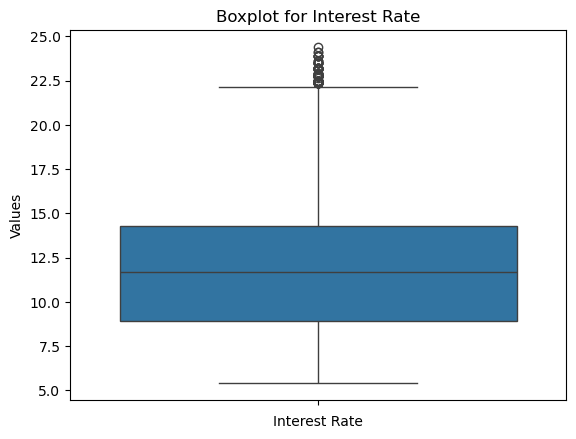

In [2572]:
sns.boxplot(loan_df.int_rate)
plt.title('Boxplot for Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

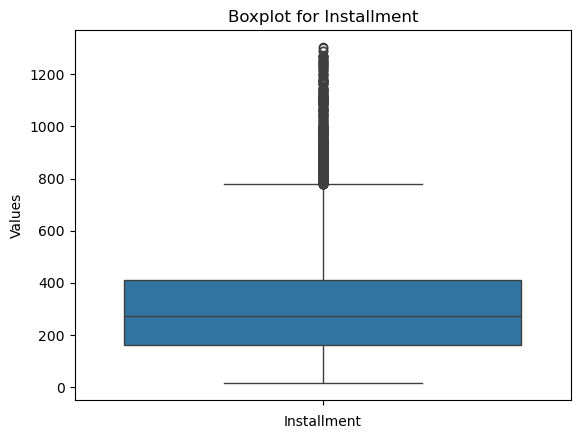

In [2574]:
sns.boxplot(loan_df.installment)
plt.title('Boxplot for Installment')
plt.xlabel('Installment')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

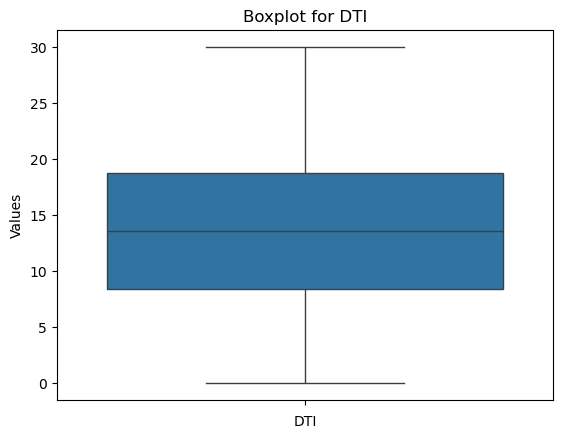

In [2576]:
sns.boxplot(loan_df.dti)
plt.title('Boxplot for DTI')
plt.xlabel('DTI')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

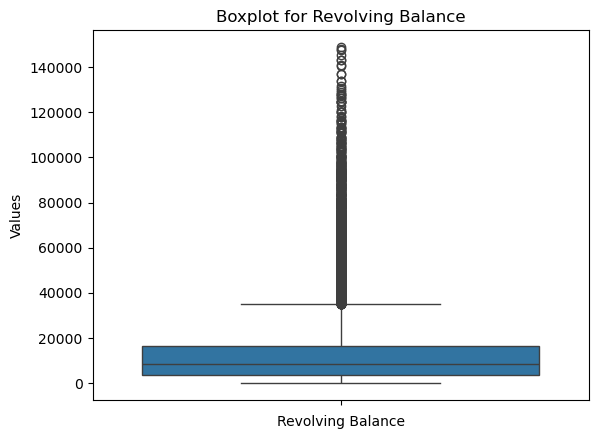

In [2578]:
sns.boxplot(loan_df.revol_bal)
plt.title('Boxplot for Revolving Balance')
plt.xlabel('Revolving Balance')
plt.ylabel('Values')

Even though other columns have some outliers , but as they are not extreme, we will proceed without removing them.
#Summarize

#### __1.10. Derived Metrics__

- Deriving year, month and quarter from issue date.
- Creating binned fields for quantitative variables (loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_bal)

In [2585]:
#Deriving year, month and quarter from issue date
loan_df['issue_y']=loan_df.issue_d.dt.year
loan_df['issue_m']=loan_df.issue_d.dt.month
loan_df['issue_q']=loan_df.issue_d.dt.quarter

In [2587]:
loan_df['loan_amnt_binned']=pd.cut(loan_df.loan_amnt,[0,5000,10000,15000,20000,25000,30000,35000],labels=['0-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K','30K-35K'])
loan_df['funded_amnt_binned']=pd.cut(loan_df.funded_amnt,[0,5000,10000,15000,20000,25000,30000,35000],labels=['0-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K','30K-35K'])
#starting with -1 as there are few 0 values
loan_df['funded_amnt_inv_binned']=pd.cut(loan_df.funded_amnt_inv,[-1,5000,10000,15000,20000,25000,30000,35000],labels=['0-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K','30K-35K'])
loan_df['int_rate_binned']=pd.cut(loan_df.int_rate,[0,5,10,15,20,25],labels=['0-5%','5%-10%','10%-15%','15%-20%','20%-25%'])
loan_df['installment_binned']=pd.cut(loan_df.installment,[0,250,500,750,1000,1250,1500],labels=['0-250','250-500','500-750','750-1000','1000-1250','1250-1500'])
loan_df['annual_inc_binned']=pd.cut(loan_df.annual_inc,[0,30000,60000,90000,120000,150000],labels=['0-30K','30K-60K','60K-90K','90K-120K','120K-150K'])
loan_df['dti_binned']=pd.cut(loan_df.dti,[-1,6,12,18,24,30],labels=['0-10','10-15','15-20','20-25','25-30'])
loan_df['revol_bal_binned']=pd.cut(loan_df.revol_bal,[-1,25000,50000,75000,100000,125000,150000],labels=['0-25K','25K-50K','50K-75K','75K-100K','100K-125K','125K-150K'])
loan_df['revol_util_binned']=pd.cut(loan_df.revol_bal,[-1,25,50,75,100],labels=['0-25','25-50','50-75','75-100'])
loan_df['total_acc_binned']=pd.cut(loan_df.total_acc,[0,25,50,75,100],labels=['0-25','25-50','50-75','75-100'])
loan_df['open_acc_binned']=pd.cut(loan_df.open_acc,[0,10,20,35,40,50],labels=['0-10','10-20','20-30','30-40','40-50'])


In [2589]:
loan_df.dti.describe()

count    36754.000000
mean        13.439892
std          6.660922
min          0.000000
25%          8.340000
50%         13.570000
75%         18.700000
max         29.990000
Name: dti, dtype: float64

In [2591]:
loan_df.open_acc.describe()

count    36754.000000
mean         9.171328
std          4.353137
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

### __2. Univariate Analysis__

Univariate Analysis is a statistical method to analyze each variable in the dataset. Checking its distribution, central tendencies and dispersion.

Following Columns will be analysed as part of Univariate Analysis:

__Categorical__ 

Ordered Categorical
- term
- grade
- sub_grade
- emp_length
- issue_y
- issue_m
- issue_q


Unordered Categorical
- loan_status
- home_ownership
- verification_status
- purpose
- addr_state

__Numerical__

Numerical (Binned)
- loan_amount_binned
- funded_amnt_binned
- Funded_amnt_inv_binned
- int_rate_binned
- installment_binned
- annual_inc_binned
- dti_binned
- revol_bal_binned
- revol_util_binned
- total_acc_binned
- open_acc_binned

Numerical (Non-Binnedc
- pub_rec_bankruptcies

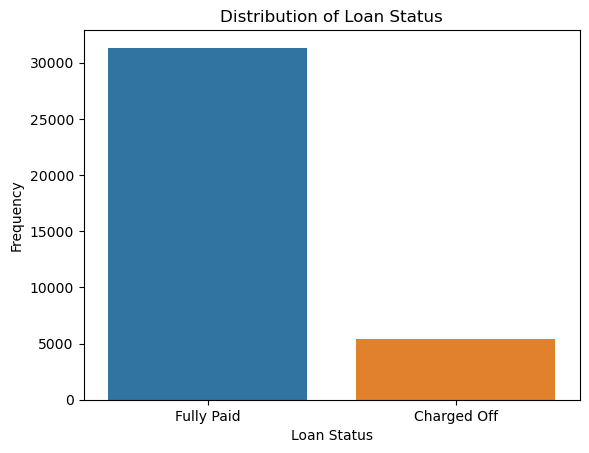

In [2595]:
#Analyzing loan status
sns.countplot(x = 'loan_status', data = loan_df,hue='loan_status')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.show()

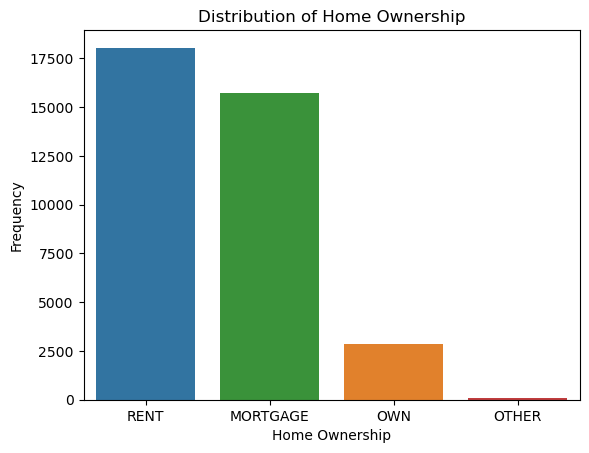

In [2596]:
#Analyzing Home Ownership
sns.countplot(x = 'home_ownership', data = loan_df,order= loan_df.home_ownership.value_counts(ascending=False).index,hue='home_ownership')
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.show()

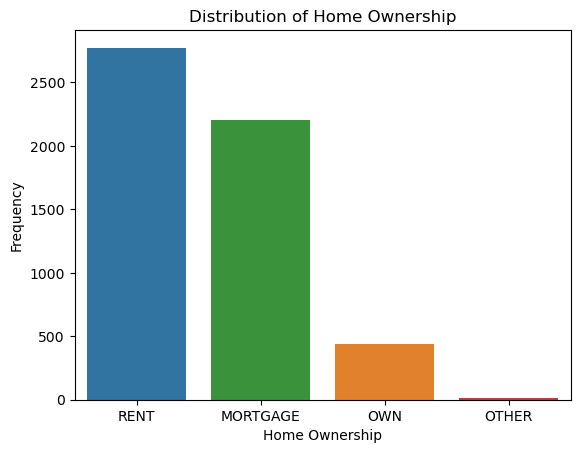

In [2598]:
#Analyzing Home Ownership (charged-off)
sns.countplot(x = 'home_ownership', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].home_ownership.value_counts(ascending=False).index,hue='home_ownership')
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.show()

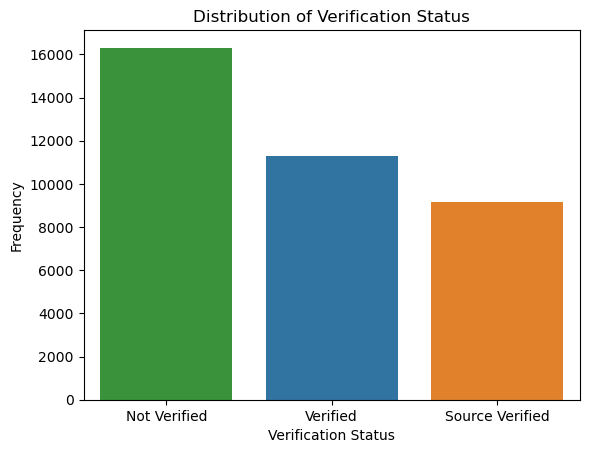

In [2600]:
#Analyzing Verification Status
sns.countplot(x = 'verification_status', data = loan_df,order= loan_df.verification_status.value_counts(ascending=False).index,hue='verification_status')
plt.title('Distribution of Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Frequency')
plt.show()

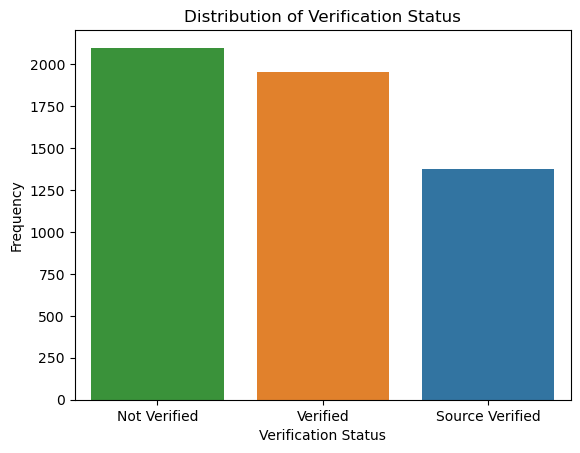

In [2602]:
#Analyzing Verification Status (Charged off)
sns.countplot(x = 'verification_status', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].verification_status.value_counts(ascending=False).index,hue='verification_status')
plt.title('Distribution of Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Frequency')
plt.show()

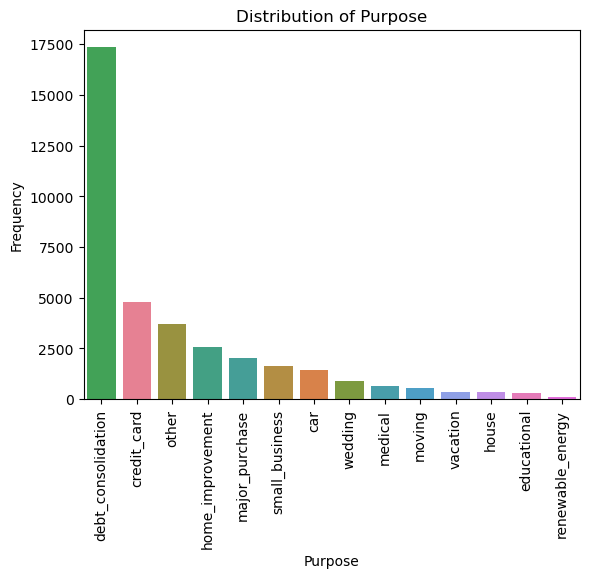

In [2604]:
#Analyzing Purpose
sns.countplot(x = 'purpose', data = loan_df,order= loan_df.purpose.value_counts(ascending=False).index,hue='purpose')
plt.title('Distribution of Purpose')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

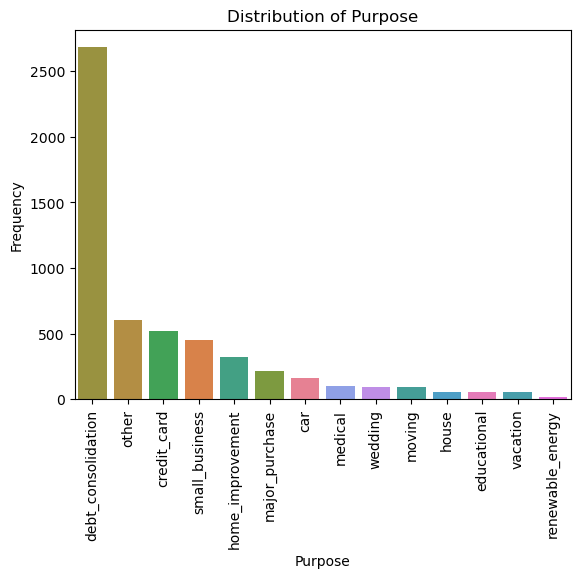

In [2606]:
#Analyzing Purpose (Charged off)
sns.countplot(x = 'purpose', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].purpose.value_counts(ascending=False).index,hue='purpose')
plt.title('Distribution of Purpose')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

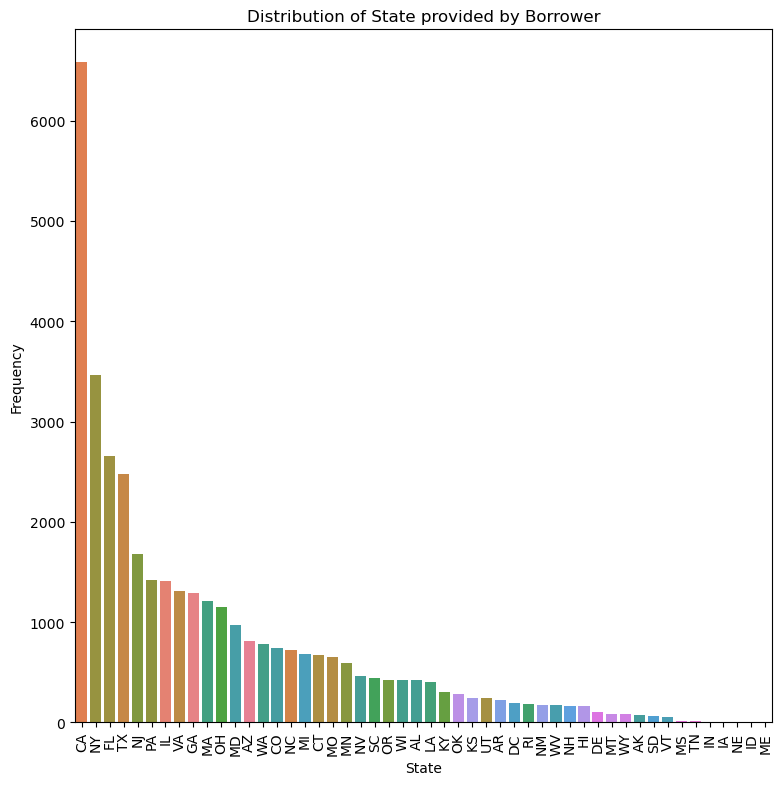

In [2607]:
#Analysing addr_state
plt.figure(figsize=(9,9))
sns.countplot(x = 'addr_state', data = loan_df,order= loan_df.addr_state.value_counts(ascending=False).index,hue='addr_state')
plt.title('Distribution of State provided by Borrower')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

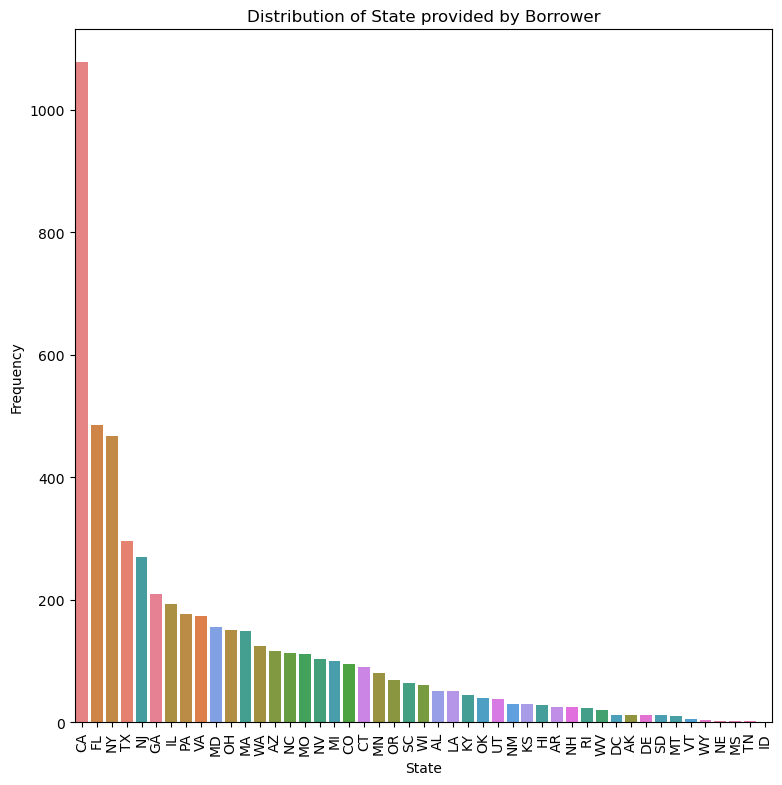

In [2609]:
#Analysing addr_state (charged off)
plt.figure(figsize=(9,9))
sns.countplot(x = 'addr_state', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].addr_state.value_counts(ascending=False).index,hue='addr_state')
plt.title('Distribution of State provided by Borrower')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

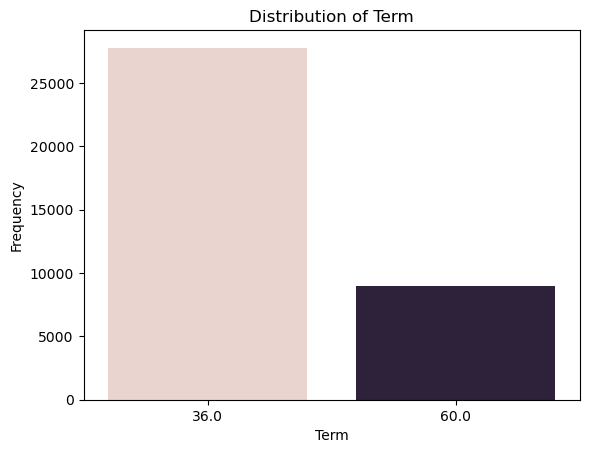

In [2611]:
#analysing term
sns.countplot(x = 'term', data = loan_df,order= loan_df.term.value_counts(ascending=False).index,hue='term')
plt.title('Distribution of Term')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.legend([],[], frameon=False)
plt.show()

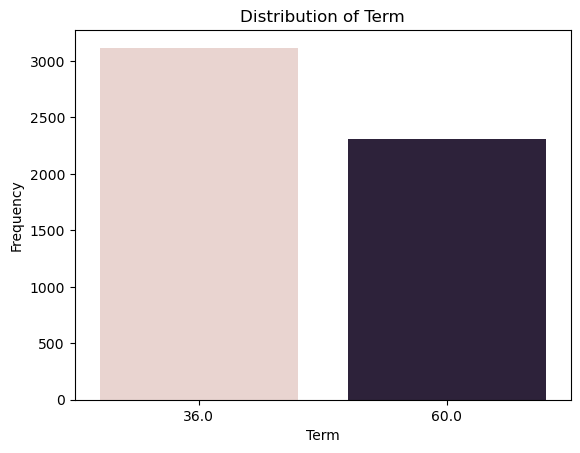

In [2612]:
#analysing term (Charged Off)
sns.countplot(x = 'term', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].term.value_counts(ascending=False).index,hue='term')
plt.title('Distribution of Term')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.legend([],[], frameon=False)
plt.show()

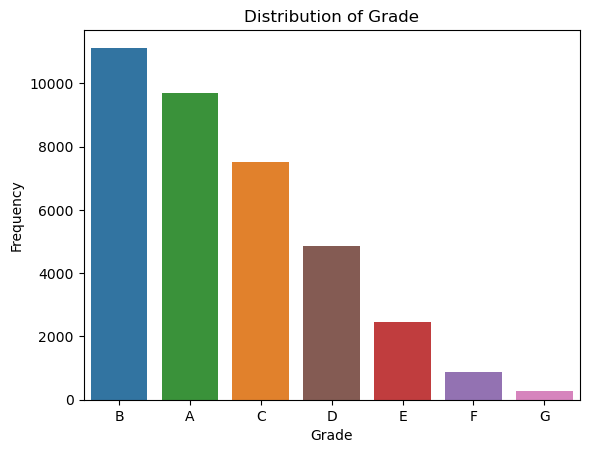

In [2613]:
#analysing grade
sns.countplot(x = 'grade', data = loan_df,order= loan_df.grade.value_counts(ascending=False).index,hue='grade')
plt.title('Distribution of Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

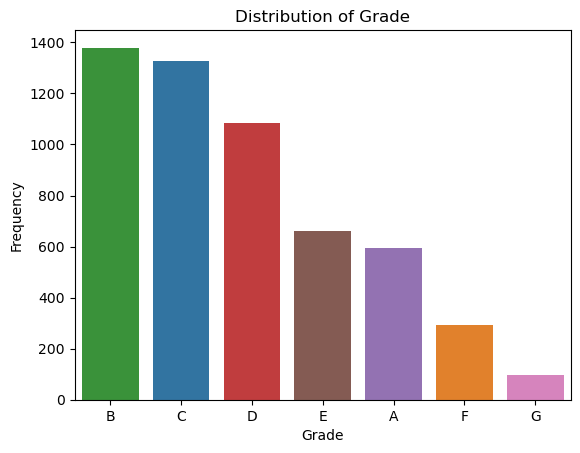

In [2614]:
#analysing grade (Charged off)
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].grade.value_counts(ascending=False).index,hue='grade')
plt.title('Distribution of Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

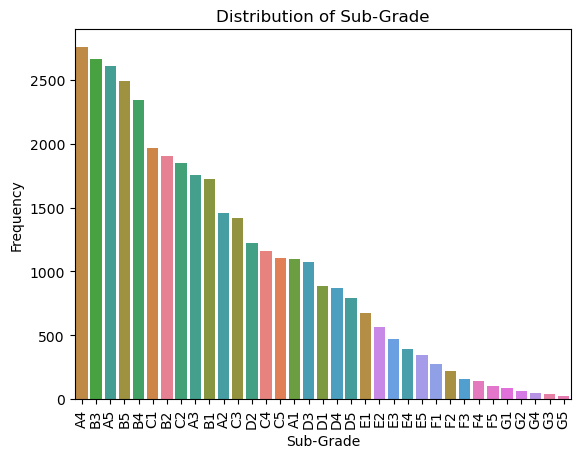

In [2616]:
#analysing sub-grade
sns.countplot(x = 'sub_grade', data = loan_df,order= loan_df.sub_grade.value_counts(ascending=False).index,hue='sub_grade')
plt.title('Distribution of Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

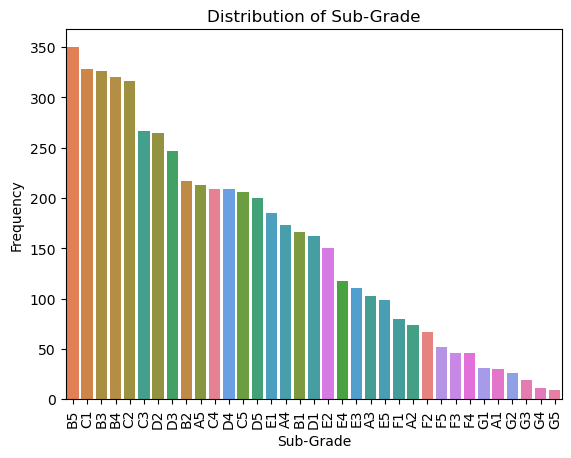

In [2617]:
#analysing sub-grade
sns.countplot(x = 'sub_grade', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].sub_grade.value_counts(ascending=False).index,hue='sub_grade')
plt.title('Distribution of Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

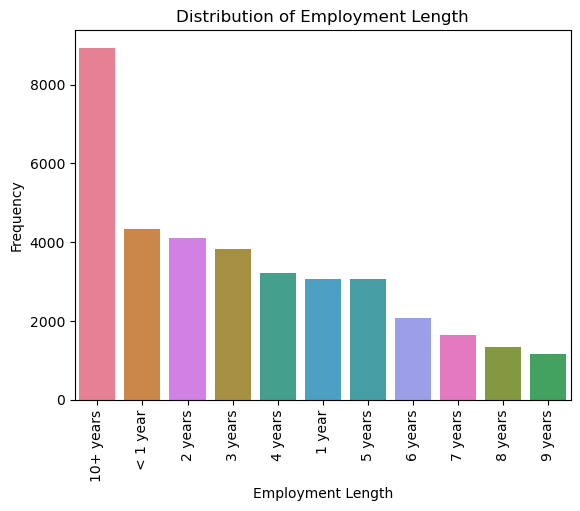

In [2618]:
#analysing employment length
sns.countplot(x = 'emp_length', data = loan_df,order= loan_df.emp_length.value_counts(ascending=False).index,hue='emp_length')
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

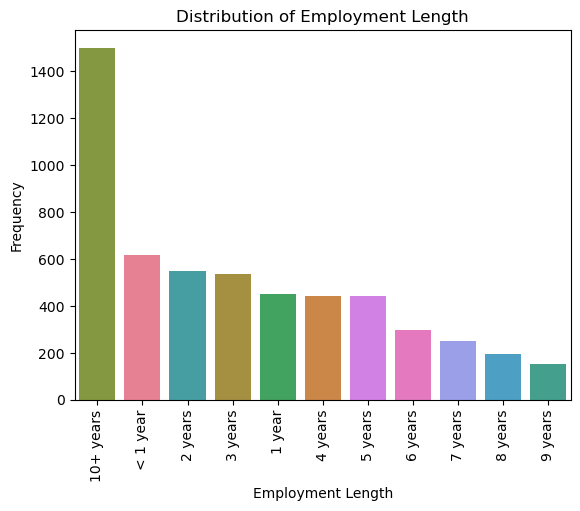

In [2620]:
#analysing employment length (Charged off)
sns.countplot(x = 'emp_length', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].emp_length.value_counts(ascending=False).index,hue='emp_length')
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

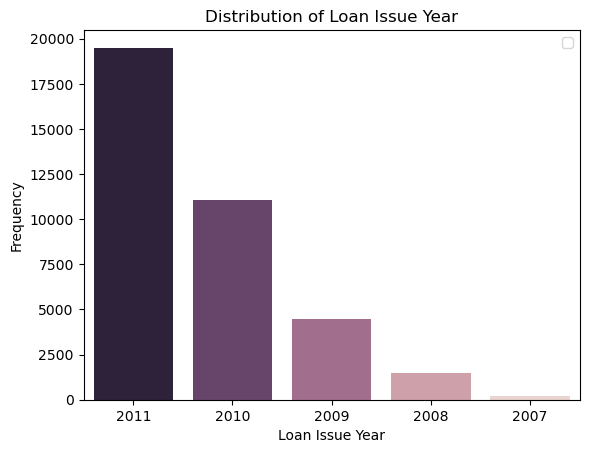

In [2623]:
#analysing loan issue year
sns.countplot(x = 'issue_y', data = loan_df,order= loan_df.issue_y.value_counts(ascending=False).index,hue='issue_y')
plt.title('Distribution of Loan Issue Year')
plt.xlabel('Loan Issue Year')
plt.ylabel('Frequency')
plt.legend([],[],frameon=True)
plt.show()

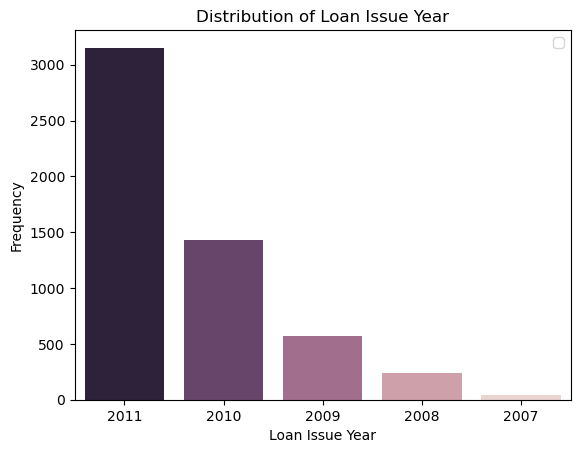

In [2624]:
#analysing loan issue year (Charged off)
sns.countplot(x = 'issue_y', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].issue_y.value_counts(ascending=False).index,hue='issue_y')
plt.title('Distribution of Loan Issue Year')
plt.xlabel('Loan Issue Year')
plt.ylabel('Frequency')
plt.legend([],[],frameon=True)
plt.show()

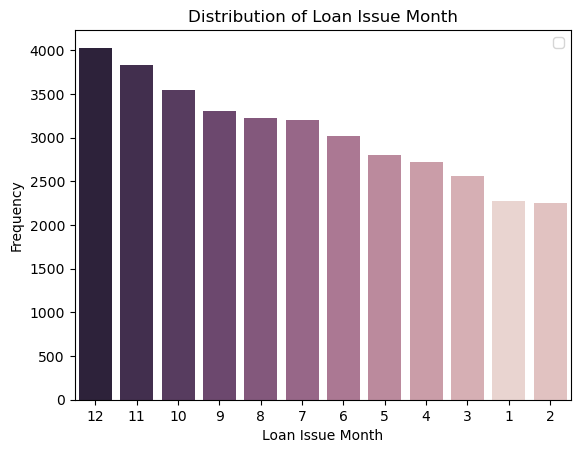

In [2627]:
#analysing loan issue month 
sns.countplot(x = 'issue_m', data = loan_df,order= loan_df.issue_m.value_counts(ascending=False).index,hue='issue_m')
plt.title('Distribution of Loan Issue Month')
plt.xlabel('Loan Issue Month')
plt.ylabel('Frequency')
plt.legend([],[],frameon=True)
plt.show()

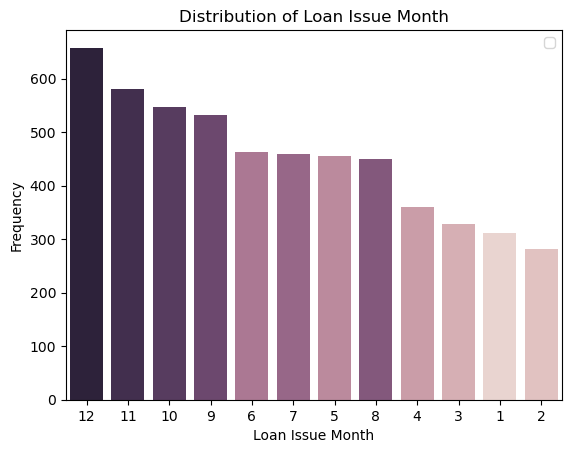

In [2628]:
#analysing loan issue month (Charged off)
sns.countplot(x = 'issue_m', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].issue_m.value_counts(ascending=False).index,hue='issue_m')
plt.title('Distribution of Loan Issue Month')
plt.xlabel('Loan Issue Month')
plt.ylabel('Frequency')
plt.legend([],[],frameon=True)
plt.show()

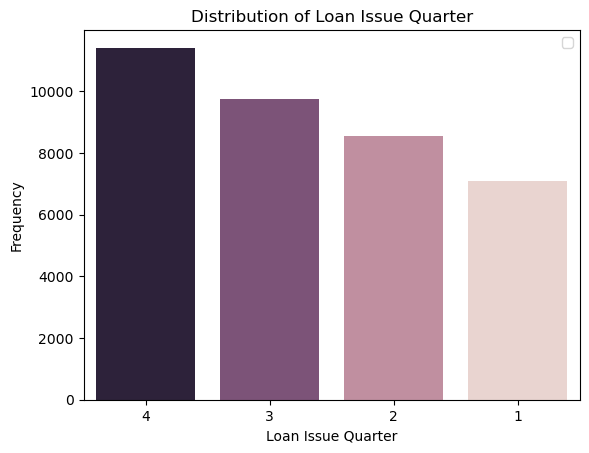

In [2629]:
#analysing loan issue quarter
sns.countplot(x = 'issue_q', data = loan_df,order= loan_df.issue_q.value_counts(ascending=False).index,hue='issue_q')
plt.title('Distribution of Loan Issue Quarter')
plt.xlabel('Loan Issue Quarter')
plt.ylabel('Frequency')
plt.legend([],[],frameon=True)
plt.show()

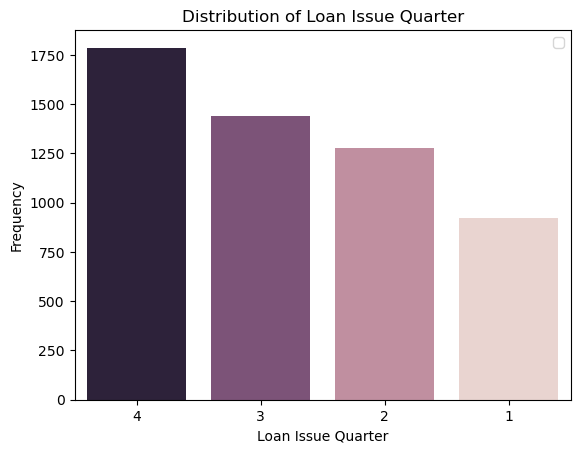

In [2631]:
#analysing loan issue quarter (Charged off)
sns.countplot(x = 'issue_q', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].issue_q.value_counts(ascending=False).index,hue='issue_q')
plt.title('Distribution of Loan Issue Quarter')
plt.xlabel('Loan Issue Quarter')
plt.ylabel('Frequency')
plt.legend([],[],frameon=True)
plt.show()

__Observations-Categorical Variables__

Unordered Categorical
- Rented Households had the highest number of observations and charge-off cases. The lending company should evaluate the loan applicants carefully before lending to rented households as they are more susceptable to default.
- Loan Applicants whose income source are not verified have higher number of observations and charge-offs when compared with verified followed by verified from source. But the difference in not verified and verified count is not very significant.
- Loans taken for Debt consolidation purpose had the highest number of observations and charge offs. The lending company should be cautious when approving loans for debt consolidation purpose.
- California had the highest number of observations and chargeoffs. The lending company can implement stricter credit policies in California.

Ordered Categorical
- Short term loans (term of 36 months) had higher observations and chargeoffs. The lending company should evaluate the loans carefully for shorter terms.
- Loans with B grade had highest number of observations and chargeoffs indicating these customers faced difficulty in repaying the loans.
- Loans with 10 + years of experience had higher number of observations and chargeoffs. Although, the total number of employees with 10+ years of experience is significantly higher than in other categories.
- Loans issued in 2011 had the highest number of observations and chargeoffs.One potential reason could be economic difficulities in the specific year.
- Loans issued in fourth quarter had the highest number of observations and chargeoffs. One potential reason for this can be that loan underwriters are providing loans with less due diligence to complete their targets.

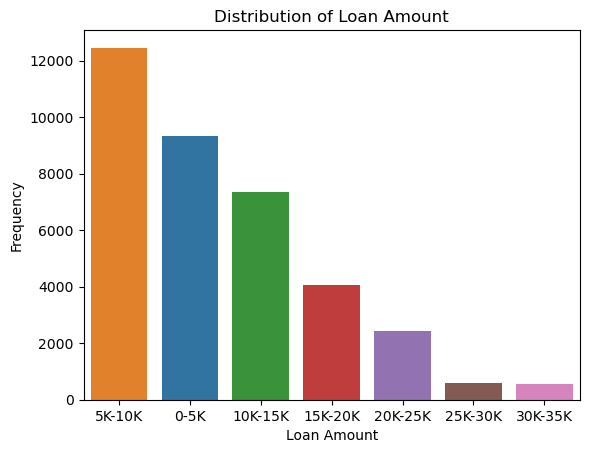

In [2634]:
#analysing loan amount 
sns.countplot(x = 'loan_amnt_binned', data = loan_df,order= loan_df.loan_amnt_binned.value_counts(ascending=False).index,hue='loan_amnt_binned')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

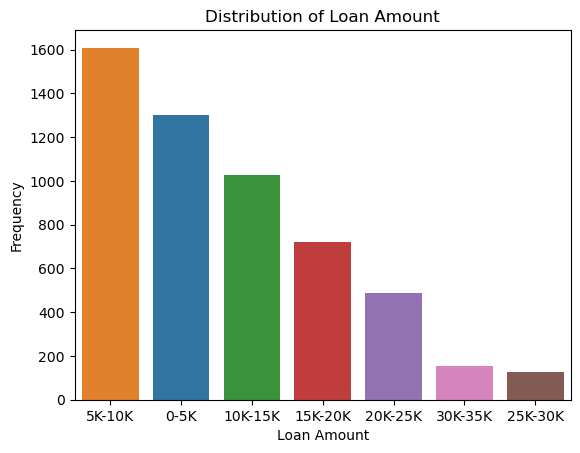

In [2635]:
#analysing loan amount (Charged off)
sns.countplot(x = 'loan_amnt_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].loan_amnt_binned.value_counts(ascending=False).index,hue='loan_amnt_binned')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

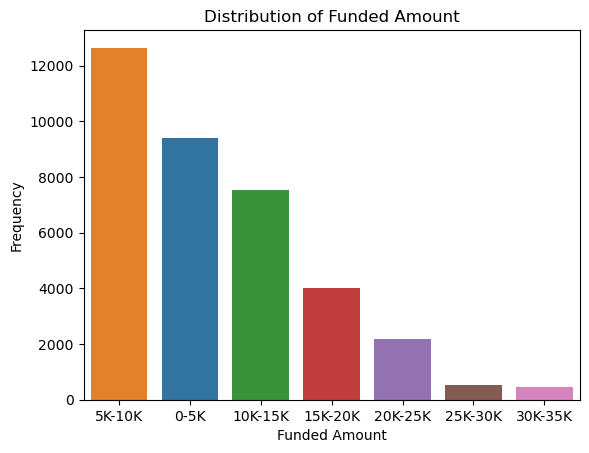

In [2637]:
#analysing funded amount
sns.countplot(x = 'funded_amnt_binned', data = loan_df,order= loan_df.funded_amnt_binned.value_counts(ascending=False).index,hue='funded_amnt_binned')
plt.title('Distribution of Funded Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.show()

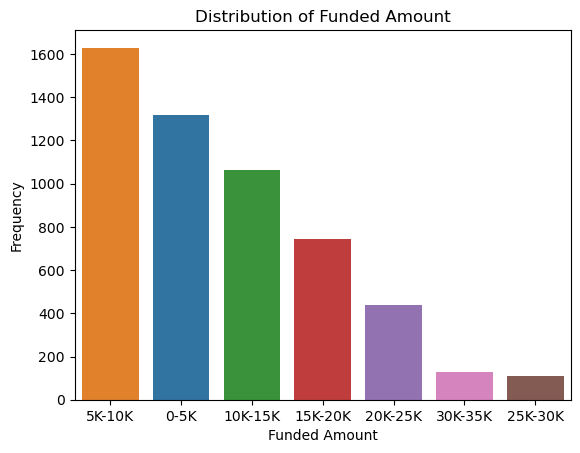

In [2639]:
#analysing funded amount (Charged off)
sns.countplot(x = 'funded_amnt_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].funded_amnt_binned.value_counts(ascending=False).index,hue='funded_amnt_binned')
plt.title('Distribution of Funded Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.show()

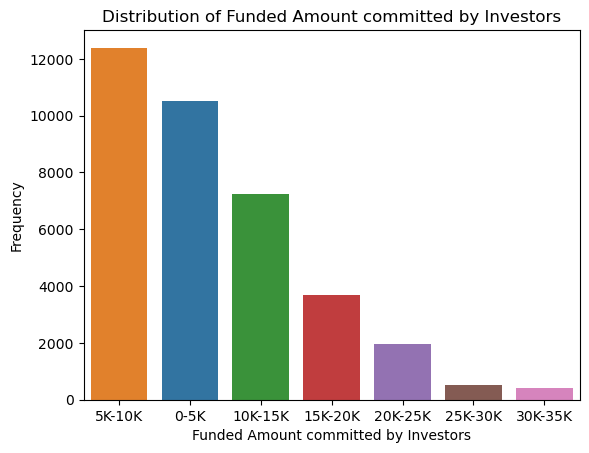

In [2641]:
#analysing funded amount committed by Investors
sns.countplot(x = 'funded_amnt_inv_binned', data = loan_df,order= loan_df.funded_amnt_inv_binned.value_counts(ascending=False).index,hue='funded_amnt_inv_binned')
plt.title('Distribution of Funded Amount committed by Investors')
plt.xlabel('Funded Amount committed by Investors')
plt.ylabel('Frequency')
plt.show()

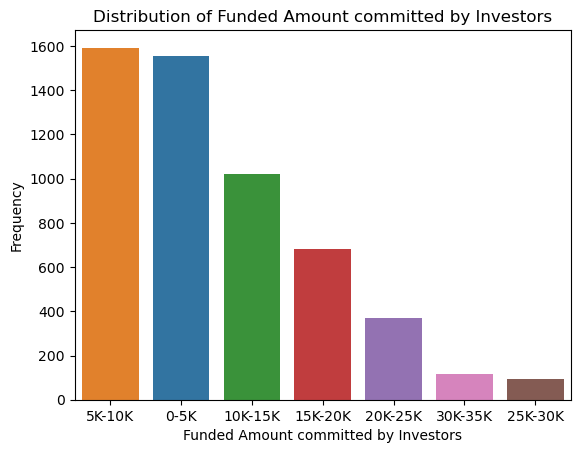

In [2643]:
#analysing funded amount committed by Investors (Charged off)
sns.countplot(x = 'funded_amnt_inv_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].funded_amnt_inv_binned.value_counts(ascending=False).index,hue='funded_amnt_inv_binned')
plt.title('Distribution of Funded Amount committed by Investors')
plt.xlabel('Funded Amount committed by Investors')
plt.ylabel('Frequency')
plt.show()

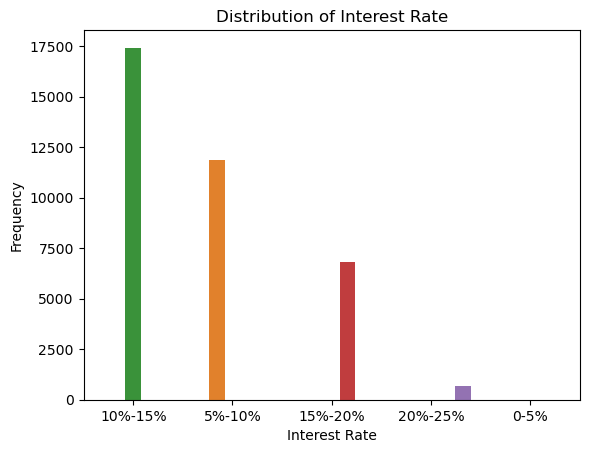

In [2644]:
#analysing Interest rate
sns.countplot(x = 'int_rate_binned', data = loan_df,order= loan_df.int_rate_binned.value_counts(ascending=False).index,hue='int_rate_binned')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

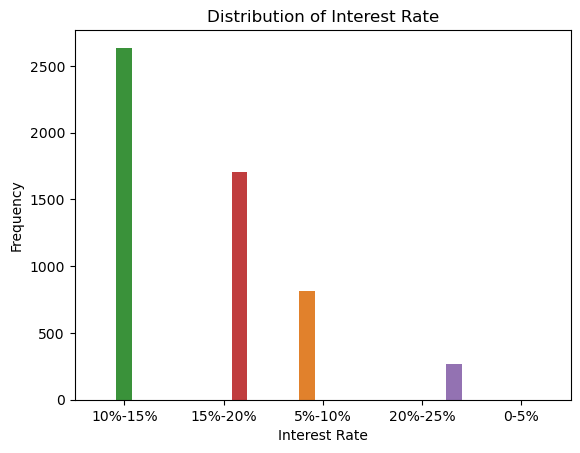

In [2646]:
#analysing Interest rate (Charged off)
sns.countplot(x = 'int_rate_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].int_rate_binned.value_counts(ascending=False).index,hue='int_rate_binned')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

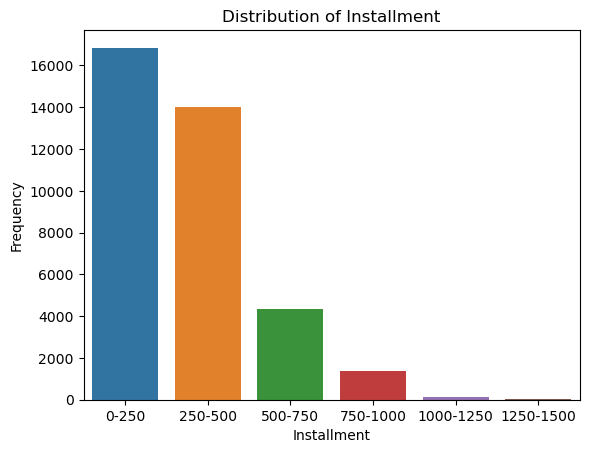

In [2648]:
#analysing Installment
sns.countplot(x = 'installment_binned', data = loan_df,order= loan_df.installment_binned.value_counts(ascending=False).index,hue='installment_binned')
plt.title('Distribution of Installment')
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.show()

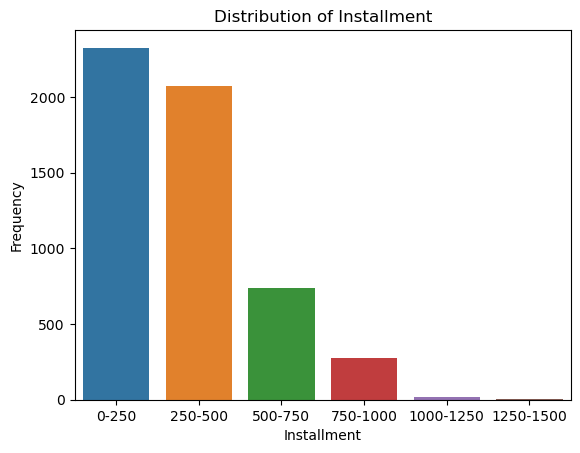

In [2650]:
#analysing Installment (Charged off)
sns.countplot(x = 'installment_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].installment_binned.value_counts(ascending=False).index,hue='installment_binned')
plt.title('Distribution of Installment')
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.show()

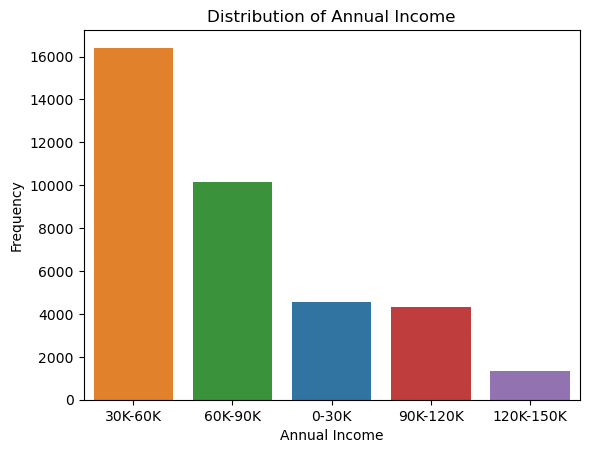

In [2652]:
#analysing annual income
sns.countplot(x = 'annual_inc_binned', data = loan_df,order= loan_df.annual_inc_binned.value_counts(ascending=False).index,hue='annual_inc_binned')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

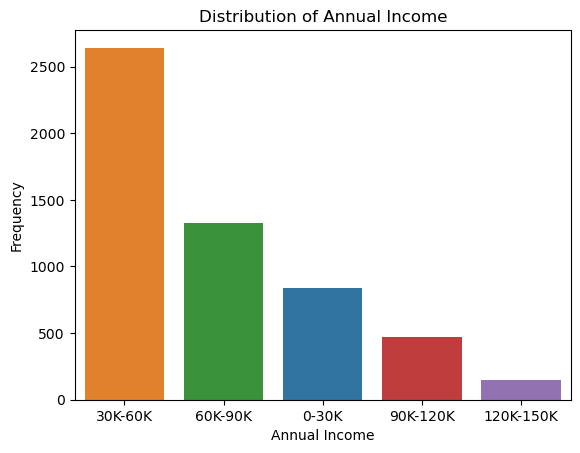

In [2653]:
#analysing annual income (Charged off)
sns.countplot(x = 'annual_inc_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].annual_inc_binned.value_counts(ascending=False).index,hue='annual_inc_binned')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

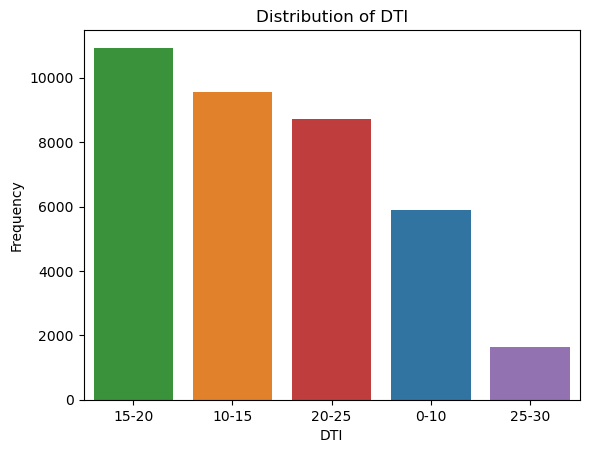

In [2655]:
#analysing dti
sns.countplot(x = 'dti_binned', data = loan_df,order= loan_df.dti_binned.value_counts(ascending=False).index,hue='dti_binned')
plt.title('Distribution of DTI')
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.show()

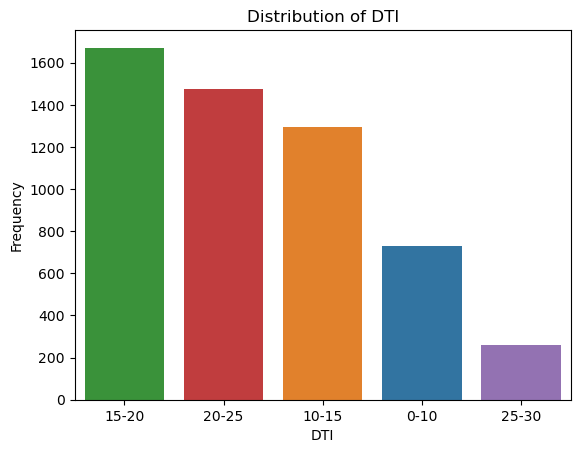

In [2657]:
#analysing dti (Charged off)
sns.countplot(x = 'dti_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].dti_binned.value_counts(ascending=False).index,hue='dti_binned')
plt.title('Distribution of DTI')
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.show()

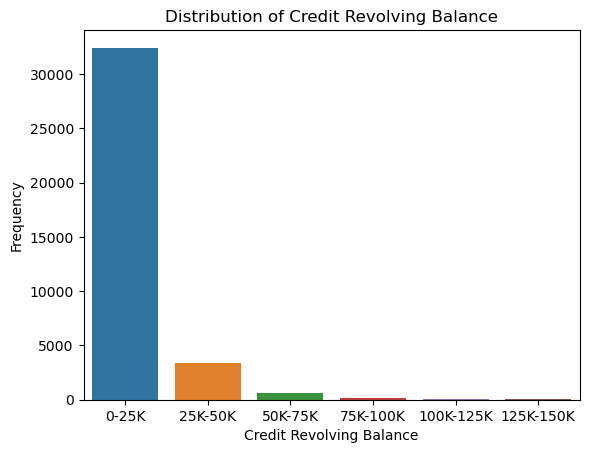

In [2659]:
#analysing revol_bal
sns.countplot(x = 'revol_bal_binned', data = loan_df,order= loan_df.revol_bal_binned.value_counts(ascending=False).index,hue='revol_bal_binned')
plt.title('Distribution of Credit Revolving Balance')
plt.xlabel('Credit Revolving Balance')
plt.ylabel('Frequency')
plt.show()

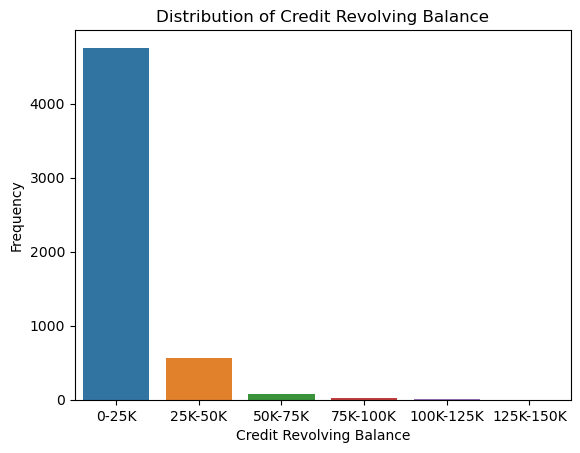

In [2661]:
#analysing revol_bal
sns.countplot(x = 'revol_bal_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].revol_bal_binned.value_counts(ascending=False).index,hue='revol_bal_binned')
plt.title('Distribution of Credit Revolving Balance')
plt.xlabel('Credit Revolving Balance')
plt.ylabel('Frequency')
plt.show()

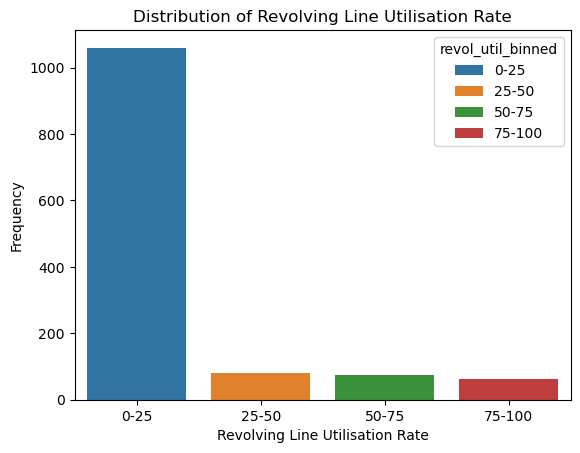

In [2663]:
#analysing revol_util
sns.countplot(x = 'revol_util_binned', data = loan_df,order= loan_df.revol_util_binned.value_counts(ascending=False).index,hue='revol_util_binned')
plt.title('Distribution of Revolving Line Utilisation Rate')
plt.xlabel('Revolving Line Utilisation Rate')
plt.ylabel('Frequency')
plt.show()

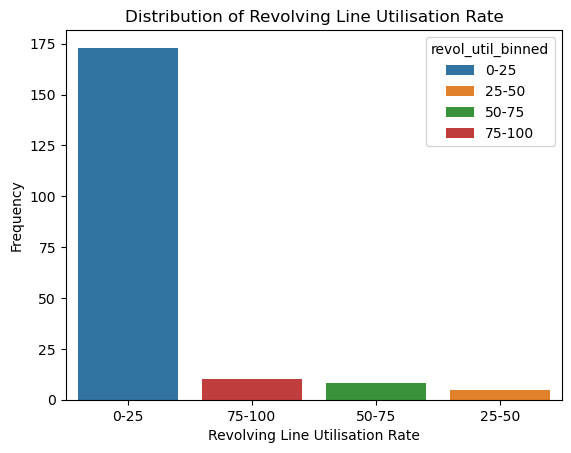

In [2665]:
#analysing revol_util (Charged off)
sns.countplot(x = 'revol_util_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].revol_util_binned.value_counts(ascending=False).index,hue='revol_util_binned')
plt.title('Distribution of Revolving Line Utilisation Rate')
plt.xlabel('Revolving Line Utilisation Rate')
plt.ylabel('Frequency')
plt.show()

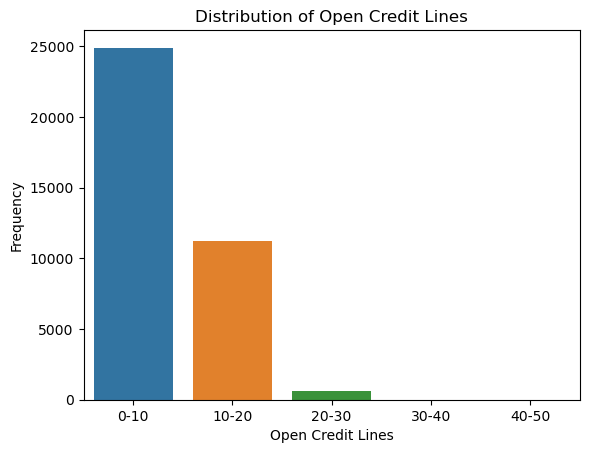

In [2667]:
#analysing open_acc
sns.countplot(x = 'open_acc_binned', data = loan_df,order= loan_df.open_acc_binned.value_counts(ascending=False).index,hue='open_acc_binned')
plt.title('Distribution of Open Credit Lines')
plt.xlabel('Open Credit Lines')
plt.ylabel('Frequency')
plt.show()

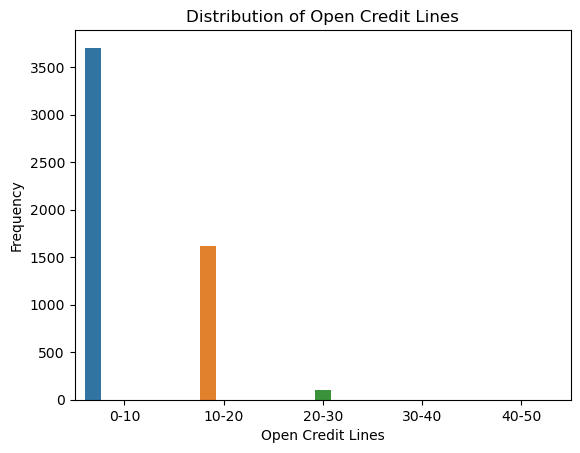

In [2669]:
#analysing open_acc (Charged off)
sns.countplot(x = 'open_acc_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].open_acc_binned.value_counts(ascending=False).index,hue='open_acc_binned')
plt.title('Distribution of Open Credit Lines')
plt.xlabel('Open Credit Lines')
plt.ylabel('Frequency')
plt.show()

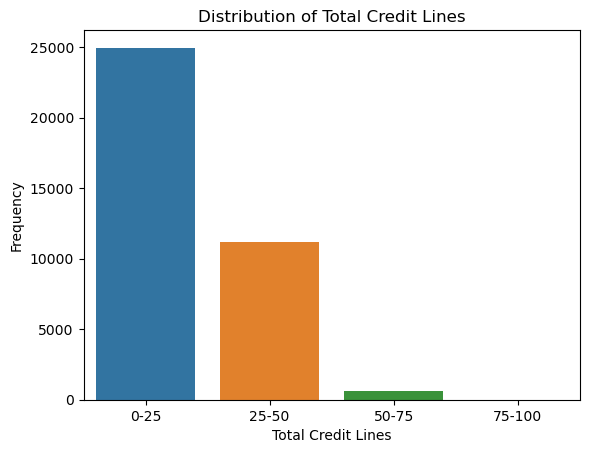

In [2671]:
#analysing total_acc
sns.countplot(x = 'total_acc_binned', data = loan_df,order= loan_df.total_acc_binned.value_counts(ascending=False).index,hue='total_acc_binned')
plt.title('Distribution of Total Credit Lines')
plt.xlabel('Total Credit Lines')
plt.ylabel('Frequency')
plt.show()

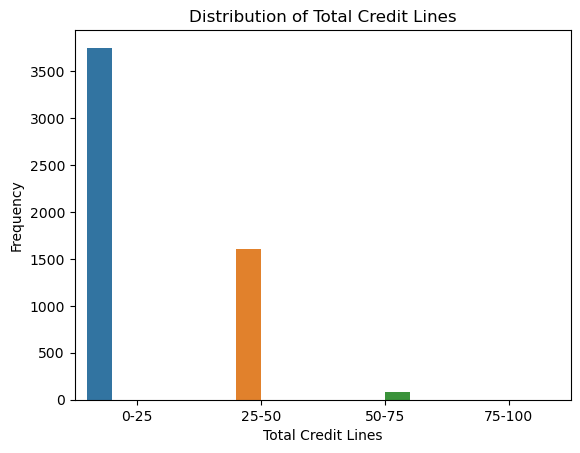

In [2673]:
#analysing total_acc (Charged off)
sns.countplot(x = 'total_acc_binned', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].total_acc_binned.value_counts(ascending=False).index,hue='total_acc_binned')
plt.title('Distribution of Total Credit Lines')
plt.xlabel('Total Credit Lines')
plt.ylabel('Frequency')
plt.show()

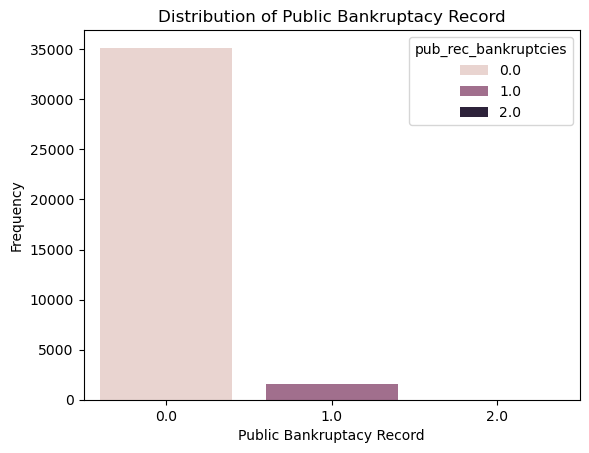

In [2674]:
#analysing pub_rec
sns.countplot(x = 'pub_rec_bankruptcies', data = loan_df,order= loan_df.pub_rec_bankruptcies.value_counts(ascending=False).index,hue='pub_rec_bankruptcies')
plt.title('Distribution of Public Bankruptacy Record')
plt.xlabel('Public Bankruptacy Record')
plt.ylabel('Frequency')
plt.show()

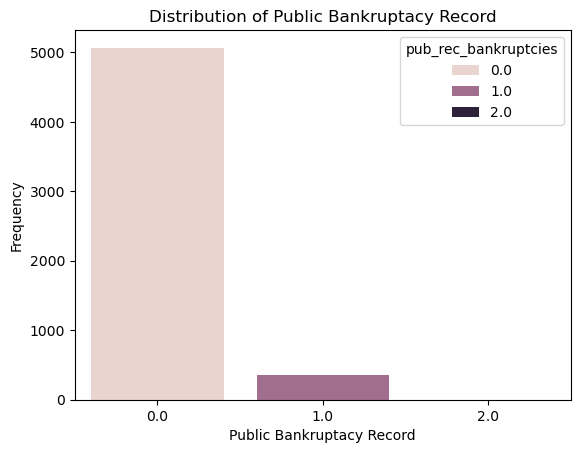

In [2676]:
#analysing pub_rec (Charged off)
sns.countplot(x = 'pub_rec_bankruptcies', data = loan_df[loan_df.loan_status =='Charged Off'],order= loan_df[loan_df.loan_status =='Charged Off'].pub_rec_bankruptcies.value_counts(ascending=False).index,hue='pub_rec_bankruptcies')
plt.title('Distribution of Public Bankruptacy Record')
plt.xlabel('Public Bankruptacy Record')
plt.ylabel('Frequency')
plt.show()

__Observations- Quantitative Variables__

- Applied Loan Amount between 5K-10K has the highest number of observations and chargeoffs. Lending company should be careful when sanctioning loans.
- Funded Loan Amount & Funded Loan Amount committed by investors between 5K-10K has the highest number of observations and chargeoffs. Lending company should fund the loans only after diligent credit worthiness analysis.
- Applicants who are charged 10-15 % interest rate have the highest observations and chargeoffs.
- Installments between 0-250 have the highest observations and chargeoffs. Lending company should assess the risk of the applicants with similar installments.
- Applicants with income of 30K-60K have the highest observations and chargeoffs. Lending company should thoroughly analyse the repaying capacity of low-middle income group.
- Applicants with Debt to Income ratio in 15-20 range have the highest observations and chargeoffs. Lending company should be careful when lending to the highly indebted customers with very high debt/income ratio.
- Applicant with revolving credit balance in 0-25 K range and utilisation 0-25 range have high observations and chargeoffs. Lending company should be cautious when lending to customers with less credit history or utilisation rates.
- Applicants with 0-10 open credit lines and 0-25 total credit lines have high observations and chargeoffs. Lending company should be cautious when lending to customers with less credit history.
- Applicants with 0 public bankruptcy record have higher observations and chargeoffs.

### __3. Segmented Univariate__

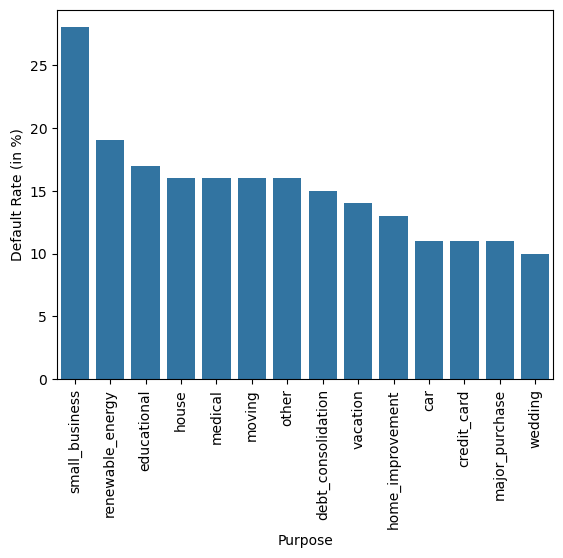

In [2682]:
#Default Rate across Purpose
purpose_dr=loan_df.groupby('purpose').apply(lambda group : round(((group['loan_status'] == 'Charged Off').sum() / len(group))*100)).sort_values(ascending= False)
sns.barplot(purpose_dr)
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.ylabel('Default Rate (in %)')
plt.show()

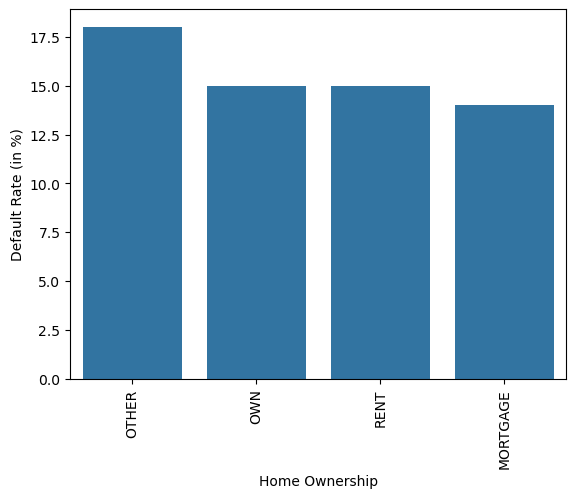

In [2684]:
#Default Rate across Home Ownership
home_ownership_dr=loan_df.groupby('home_ownership').apply(lambda group : round(((group['loan_status'] == 'Charged Off').sum() / len(group))*100)).sort_values(ascending= False)
sns.barplot(home_ownership_dr)
plt.xticks(rotation=90)
plt.xlabel('Home Ownership')
plt.ylabel('Default Rate (in %)')
plt.show()

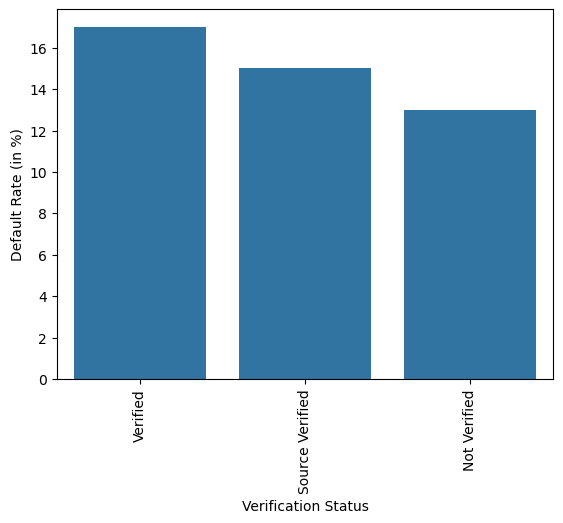

In [2686]:
#Default Rate across Verification
verification_dr=loan_df.groupby('verification_status').apply(lambda group : round(((group['loan_status'] == 'Charged Off').sum() / len(group))*100)).sort_values(ascending= False)
sns.barplot(verification_dr)
plt.xticks(rotation=90)
plt.xlabel('Verification Status')
plt.ylabel('Default Rate (in %)')
plt.show()

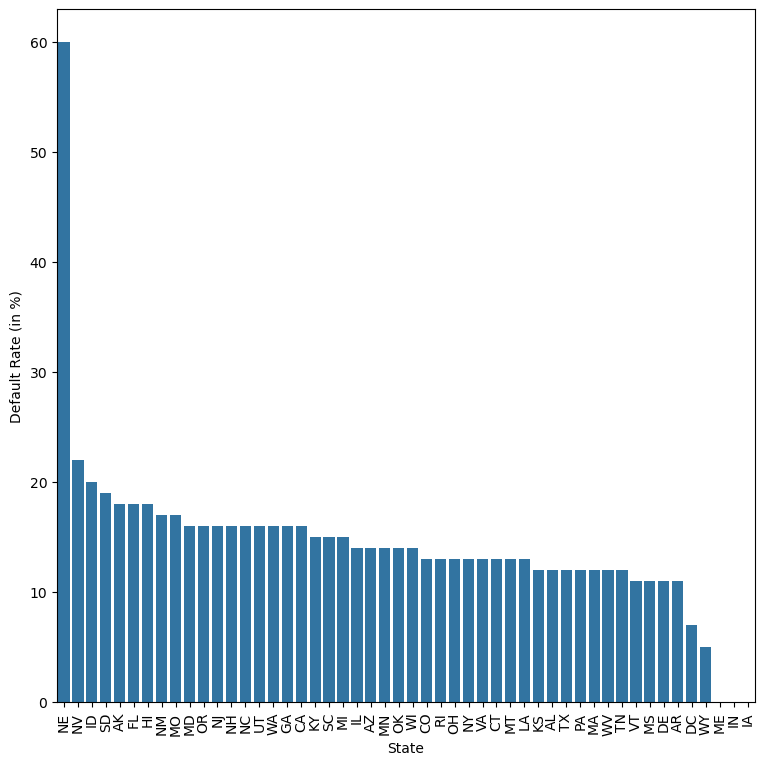

In [2688]:
#Default Rate across Address
state_dr=loan_df.groupby('addr_state').apply(lambda group : round(((group['loan_status'] == 'Charged Off').sum() / len(group))*100)).sort_values(ascending= False)
plt.figure(figsize=(9,9))
sns.barplot(state_dr)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Default Rate (in %)')
plt.show()

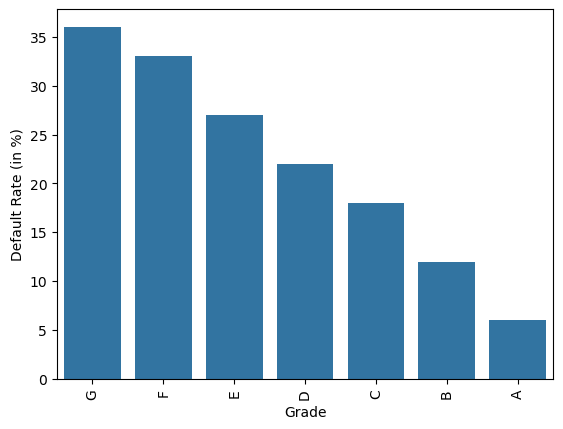

In [2690]:
#Default Rate across Grade
grade_dr=loan_df.groupby('grade').apply(lambda group : round(((group['loan_status'] == 'Charged Off').sum() / len(group))*100)).sort_values(ascending= False)
sns.barplot(grade_dr)
plt.xticks(rotation=90)
plt.xlabel('Grade')
plt.ylabel('Default Rate (in %)')
plt.show()

Text(0, 0.5, 'Default Rate (in %)')

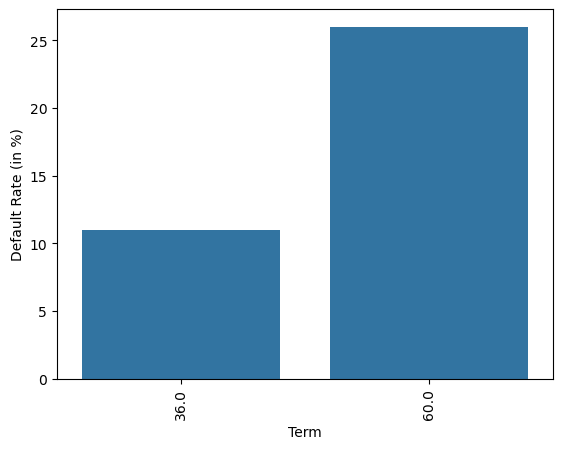

In [2692]:
#Default Rate across Term
term_dr=loan_df.groupby('term').apply(lambda group : round(((group['loan_status'] == 'Charged Off').sum() / len(group))*100)).sort_values(ascending= False)
sns.barplot(term_dr)
plt.xticks(rotation=90)
plt.xlabel('Term')
plt.ylabel('Default Rate (in %)')

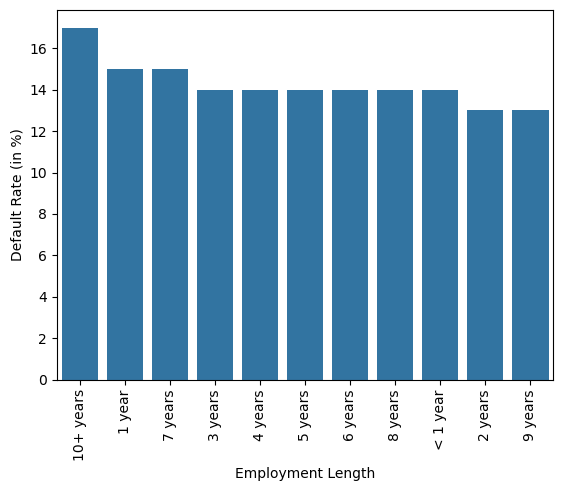

In [2694]:
#Default Rate across Employment length
emp_length_dr=loan_df.groupby('emp_length').apply(lambda group : round(((group['loan_status'] == 'Charged Off').sum() / len(group))*100)).sort_values(ascending= False)
sns.barplot(emp_length_dr)
plt.xticks(rotation=90)
plt.xlabel('Employment Length')
plt.ylabel('Default Rate (in %)')
plt.show()

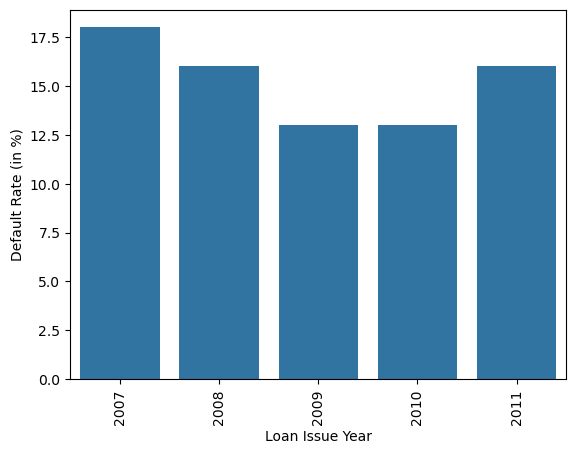

In [2696]:
#Default Rate across Issue year
issue_y_dr=loan_df.groupby('issue_y').apply(lambda group : round(((group['loan_status'] == 'Charged Off').sum() / len(group))*100)).sort_values(ascending= False)
sns.barplot(issue_y_dr)
plt.xticks(rotation=90)
plt.xlabel('Loan Issue Year')
plt.ylabel('Default Rate (in %)')
plt.show()

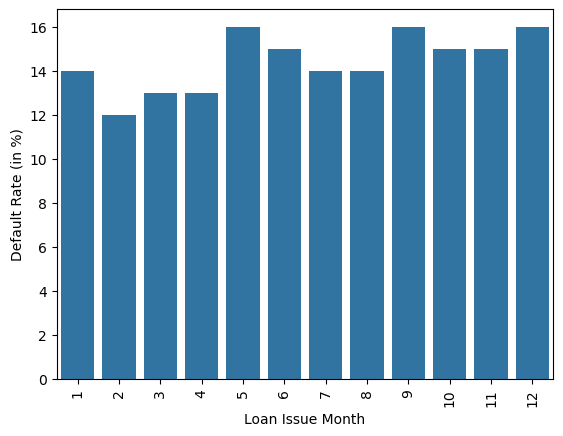

In [2698]:
#Default Rate across Issue Month
issue_m_dr=loan_df.groupby('issue_m').apply(lambda group : round(((group['loan_status'] == 'Charged Off').sum() / len(group))*100)).sort_values(ascending= False)
sns.barplot(issue_m_dr)
plt.xticks(rotation=90)
plt.xlabel('Loan Issue Month')
plt.ylabel('Default Rate (in %)')
plt.show()

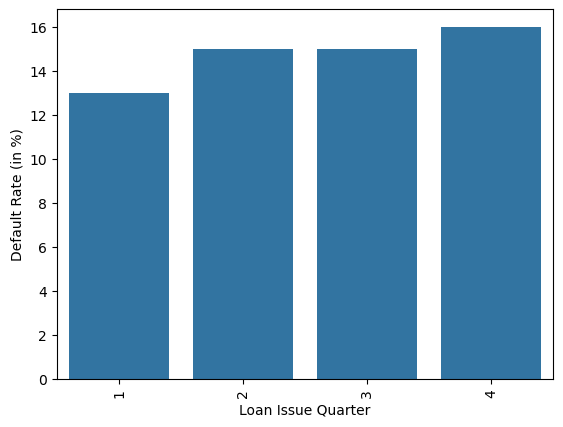

In [2700]:
#Default Rate across Issue Month
issue_q_dr=loan_df.groupby('issue_q').apply(lambda group : round(((group['loan_status'] == 'Charged Off').sum() / len(group))*100)).sort_values(ascending= False)
sns.barplot(issue_q_dr)
plt.xticks(rotation=90)
plt.xlabel('Loan Issue Quarter')
plt.ylabel('Default Rate (in %)')
plt.show()

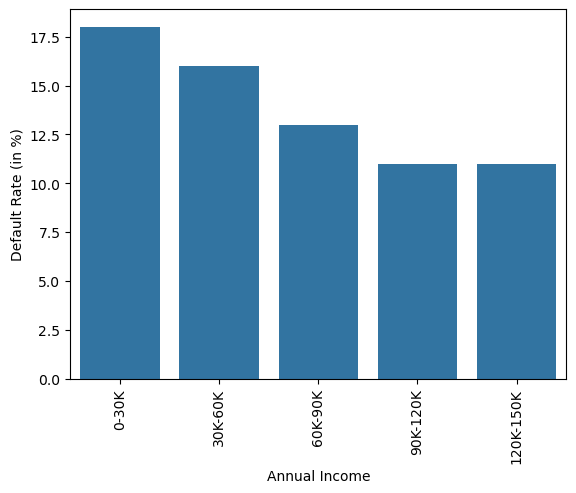

In [2702]:
#Default Rate across Annual Income
income_dr=loan_df.groupby('annual_inc_binned').apply(lambda group : round(((group['loan_status'] == 'Charged Off').sum() / len(group))*100)).sort_values(ascending= False)
sns.barplot(income_dr)
plt.xticks(rotation=90)
plt.xlabel('Annual Income')
plt.ylabel('Default Rate (in %)')
plt.show()

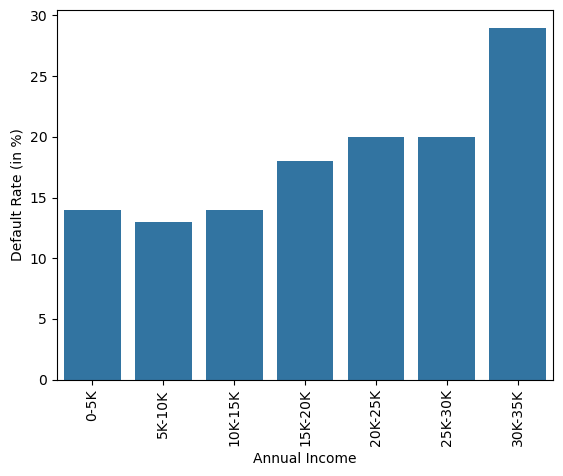

In [2703]:
#Default Rate across Funded Amount
funded_dr=loan_df.groupby('funded_amnt_binned').apply(lambda group : round(((group['loan_status'] == 'Charged Off').sum() / len(group))*100)).sort_values(ascending= False)
sns.barplot(funded_dr)
plt.xticks(rotation=90)
plt.xlabel('Annual Income')
plt.ylabel('Default Rate (in %)')
plt.show()

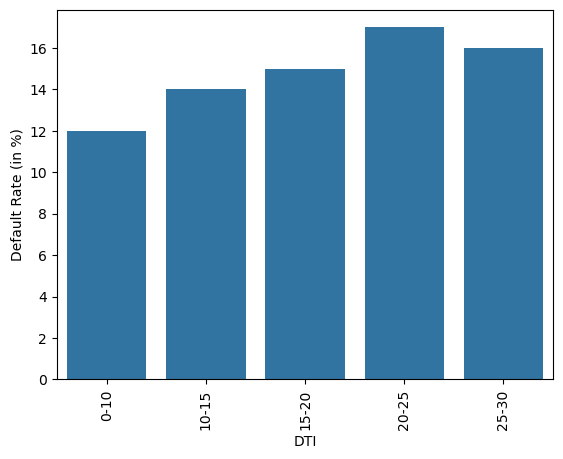

In [2706]:
#Default Rate across DTI
dti_dr=loan_df.groupby('dti_binned').apply(lambda group : round(((group['loan_status'] == 'Charged Off').sum() / len(group))*100)).sort_values(ascending= False)
sns.barplot(dti_dr)
plt.xticks(rotation=90)
plt.xlabel('DTI')
plt.ylabel('Default Rate (in %)')
plt.show()

__Observations__

- Loan applicants with Small Business have higher default rates.
- Other home ownership category has higher default rates.
- Verified Income Source have higher default rates. 
- Nebraska has high default rates.
- Longer term (60 months) have higher default rates.
- Worse Grades (G) have high default rates.
- Applicants with longer employment (10 + years) have high default rates.
- Loans issued in Q4 have high default rates.
- Annual Income 0-30 K have high default rates.
- High funded amount loans in the range 30-35K have high default rates.
- High Debt to Income Ratio (20-25) have high default rates


### __4. Bivariate Analysis and Multivariate Analysis__

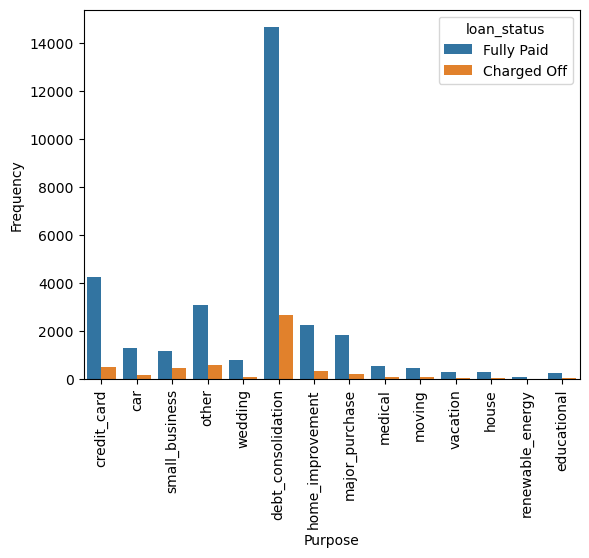

In [2711]:
#Purpose vs Loan Status
sns.countplot(data=loan_df,x='purpose',hue='loan_status')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

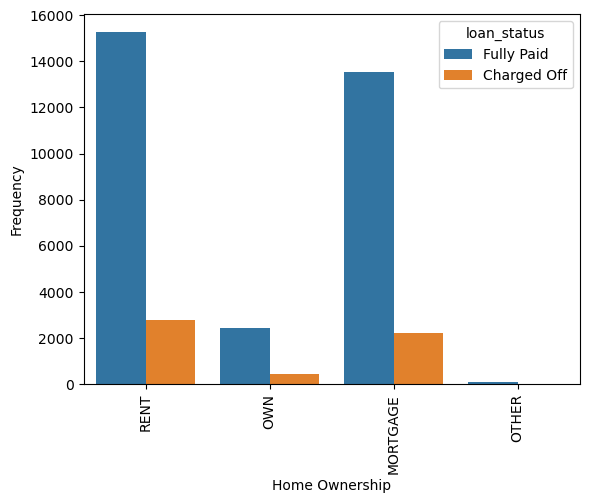

In [2713]:
#Home Ownership vs Loan Status
sns.countplot(data=loan_df,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

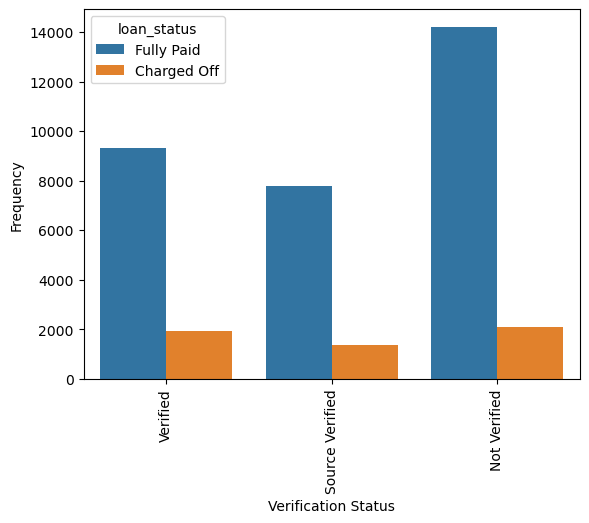

In [2714]:
#Verfication Status vs Loan Status
sns.countplot(data=loan_df,x='verification_status',hue='loan_status')
plt.xlabel('Verification Status')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

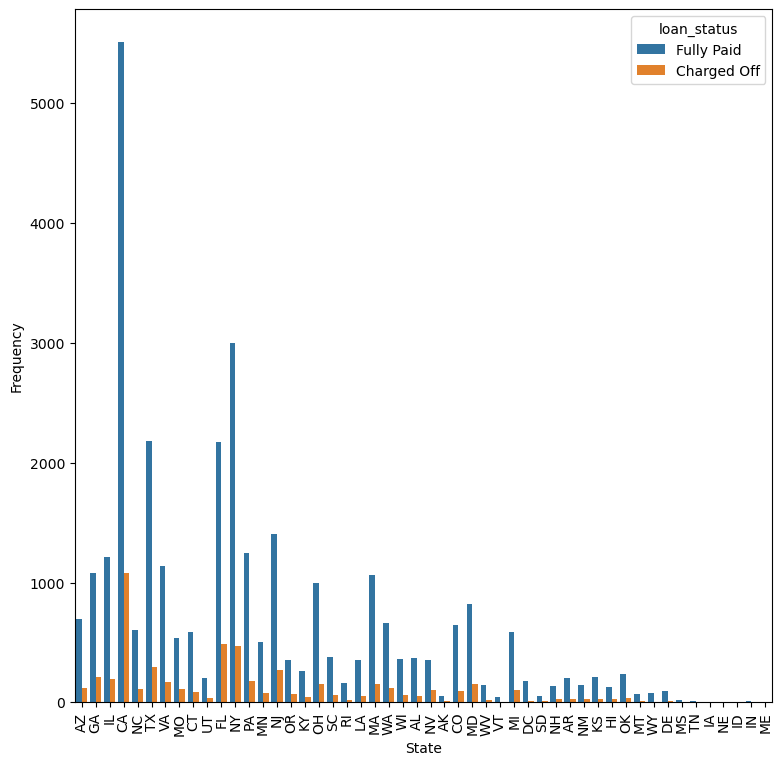

In [2715]:
#Address vs Loan Status
plt.figure(figsize=(9,9))
sns.countplot(data=loan_df,x='addr_state',hue='loan_status')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

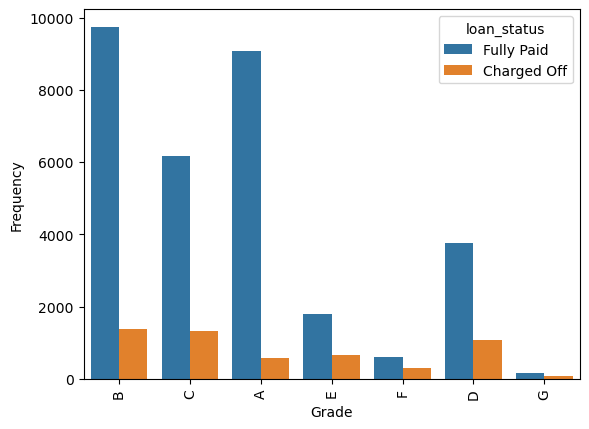

In [2716]:
#Grade vs Loan Status
sns.countplot(data=loan_df,x='grade',hue='loan_status')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

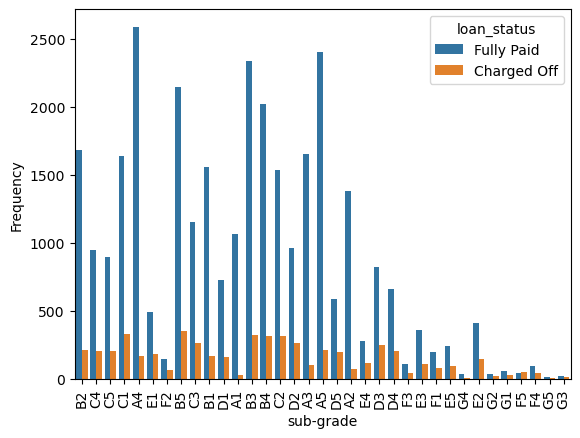

In [2717]:
#Loan Sub-Grade vs Loan Status
sns.countplot(data=loan_df,x='sub_grade',hue='loan_status')
plt.xlabel('sub-grade')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

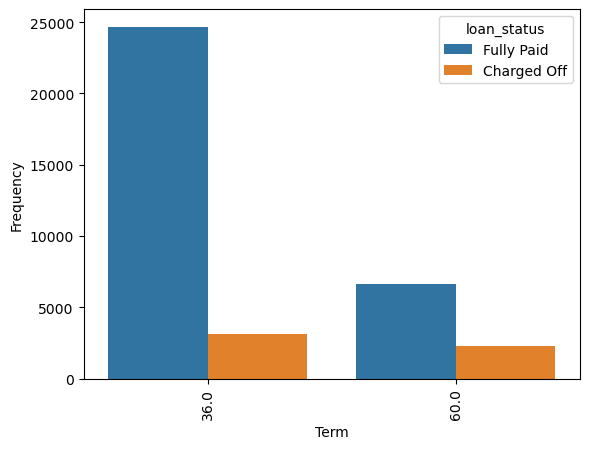

In [2718]:
#Loan Term vs Loan Status
sns.countplot(data=loan_df,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

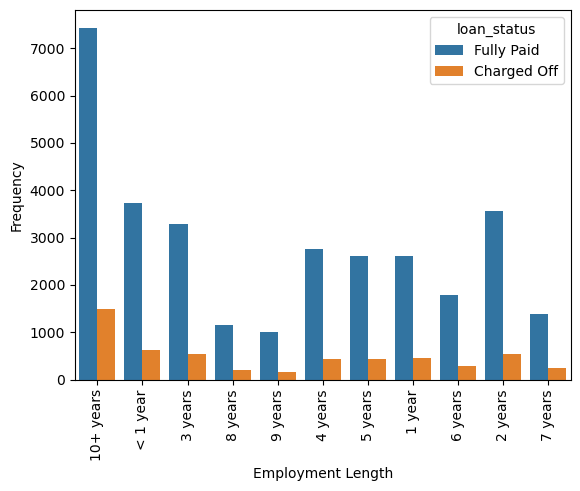

In [2720]:
#Employment Length vs Loan Status
sns.countplot(data=loan_df,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

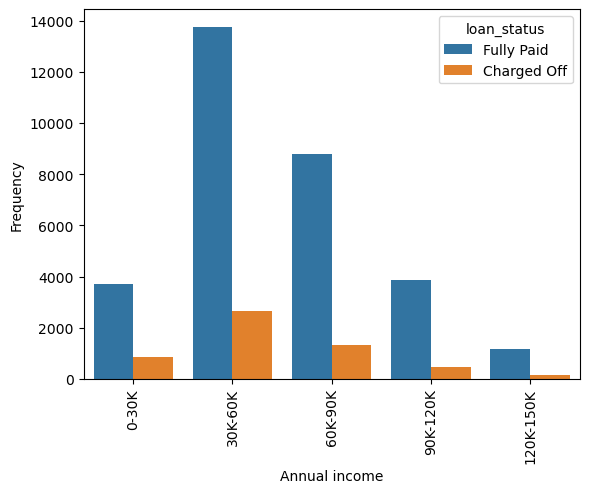

In [2722]:
#Annual Income vs Loan Status
sns.countplot(data=loan_df,x='annual_inc_binned',hue='loan_status')
plt.xlabel('Annual income')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

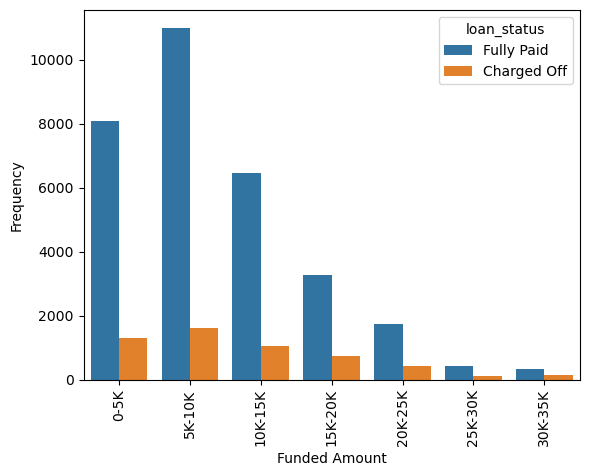

In [2724]:
#Funded Amount vs Loan Status
sns.countplot(data=loan_df,x='funded_amnt_binned',hue='loan_status')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

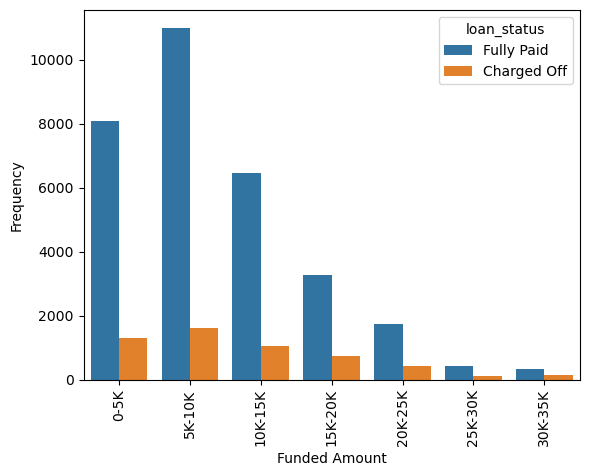

In [2727]:
#Funded Amount vs Loan Status
sns.countplot(data=loan_df,x='funded_amnt_binned',hue='loan_status')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

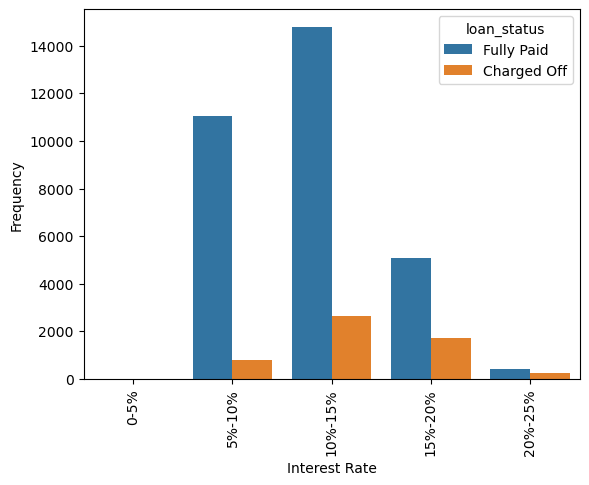

In [2729]:
#Interest Rate vs Loan Status
sns.countplot(data=loan_df,x='int_rate_binned',hue='loan_status')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

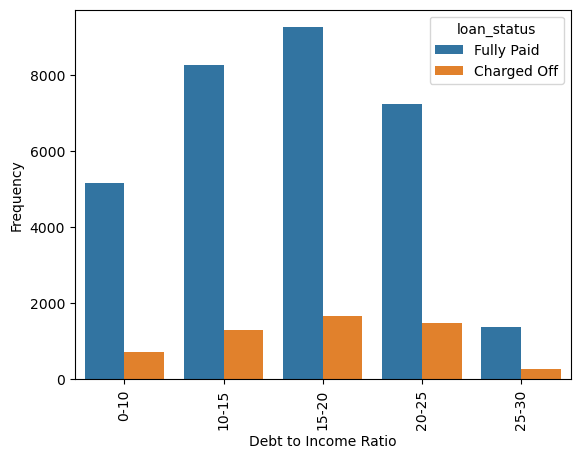

In [2731]:
#Interest Rate vs DTI
sns.countplot(data=loan_df,x='dti_binned',hue='loan_status')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

__Observations of Bivariate Analysis__

- Debt consolidation category has the highest number of loans and defaults
- Rent and Mortgage have high number of loans and defaults
- Non-verified sources of Income have high number of loans and defaults
- California has high number of loans and defaults
-Grade B have high number of loans and defaults
- Shorter loan term (36 months) have high number of loans and defaults
- Applicants with high work experience (10 + years) have high number of observations and defaults
- Applicants with 30-60 K income get more loans and default more
- Funded loans in 5K-10 K have more loans and defaults
- Loans with 5-10 % interest rate have more observations and defaults
- Loans wit 15-20 DTI have more loans and defaults

__Analysing Annual Income with other columns for further insights__

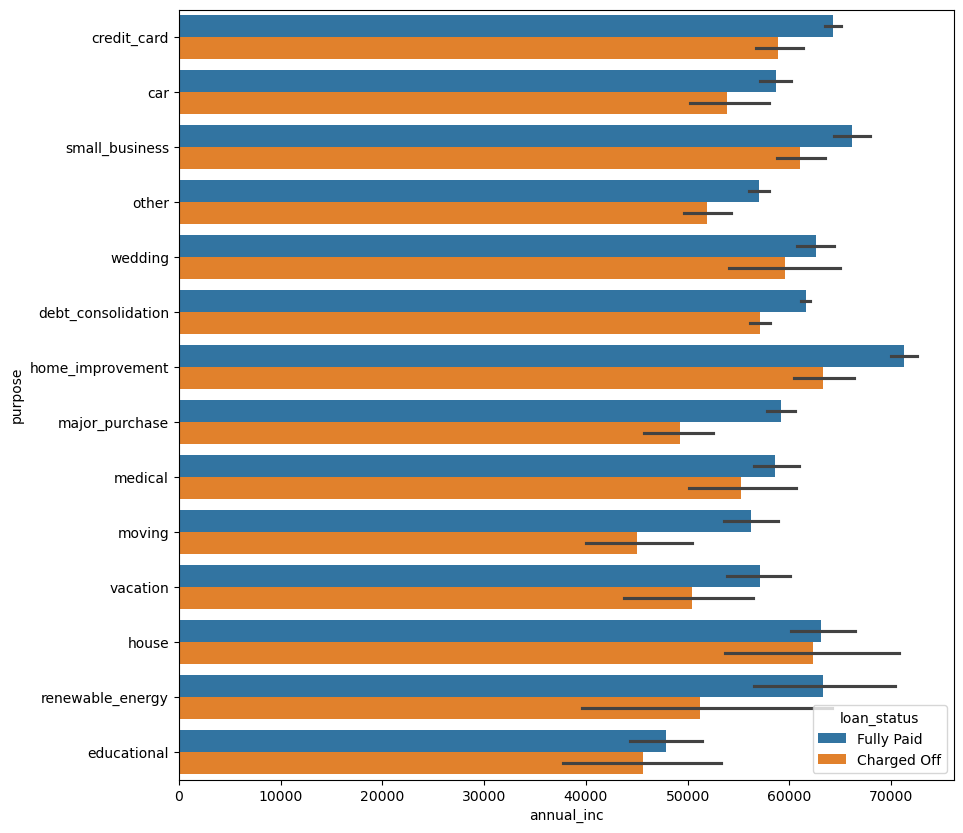

In [2736]:
#Analysing Annual Income vs Purpose 
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='annual_inc', y='purpose', hue ='loan_status')
plt.show()

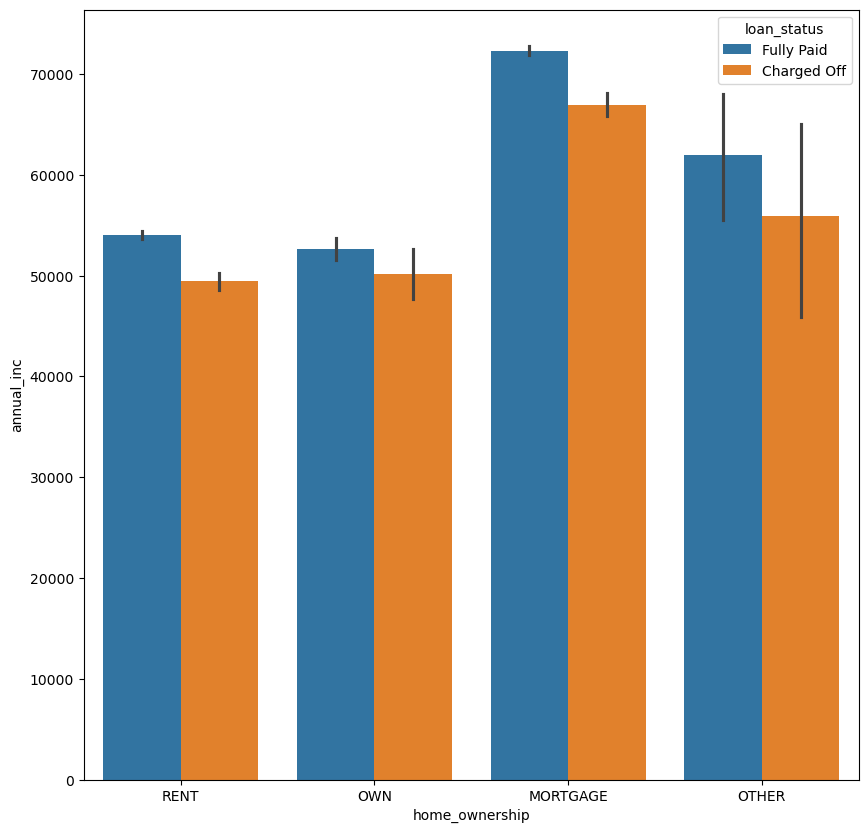

In [2738]:
#Annual Income vs Home Ownership
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='home_ownership', y='annual_inc', hue ='loan_status')
plt.show()

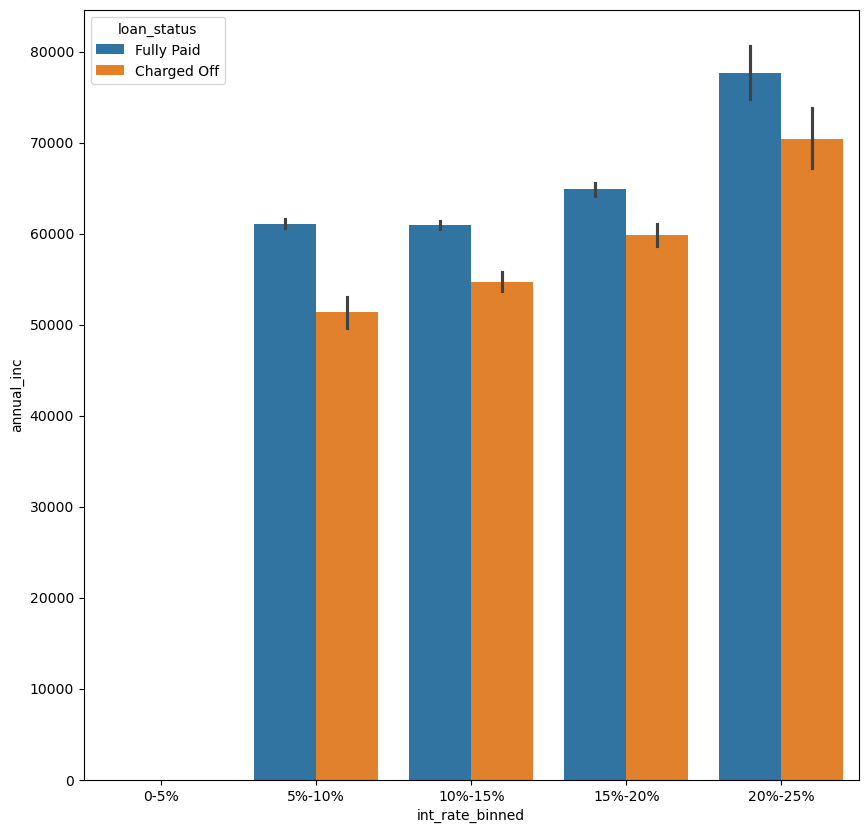

In [2740]:
#Annual Income vs Interest Rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='int_rate_binned', y='annual_inc', hue ='loan_status')
plt.show()

__Analysing Loan Amount with other columns for more insights__

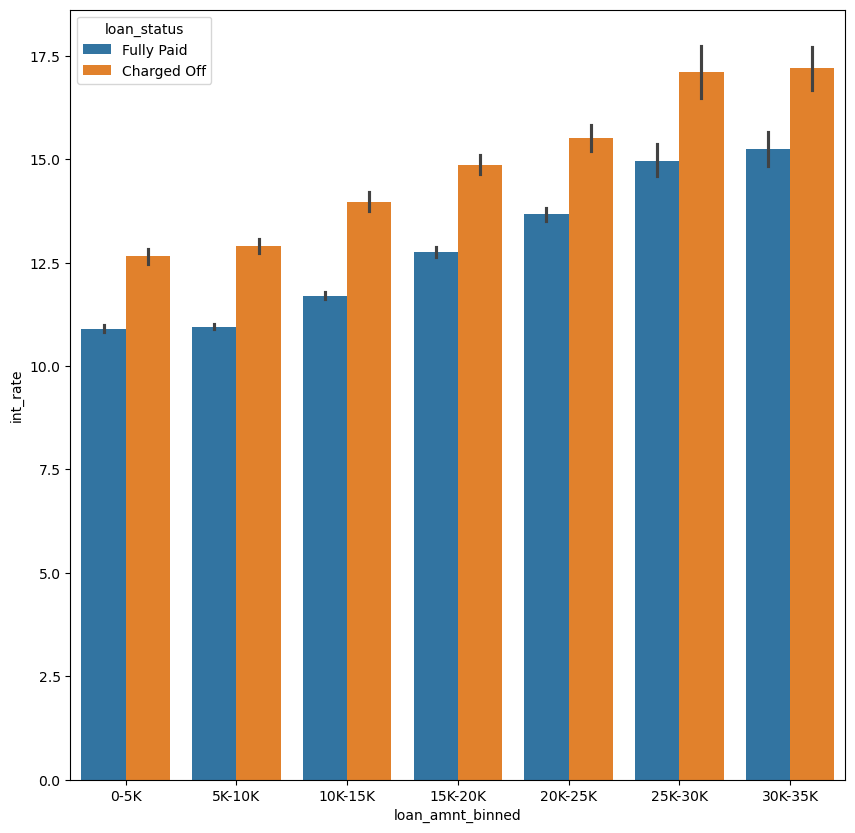

In [2744]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt_binned', y='int_rate', hue ='loan_status')
plt.show()

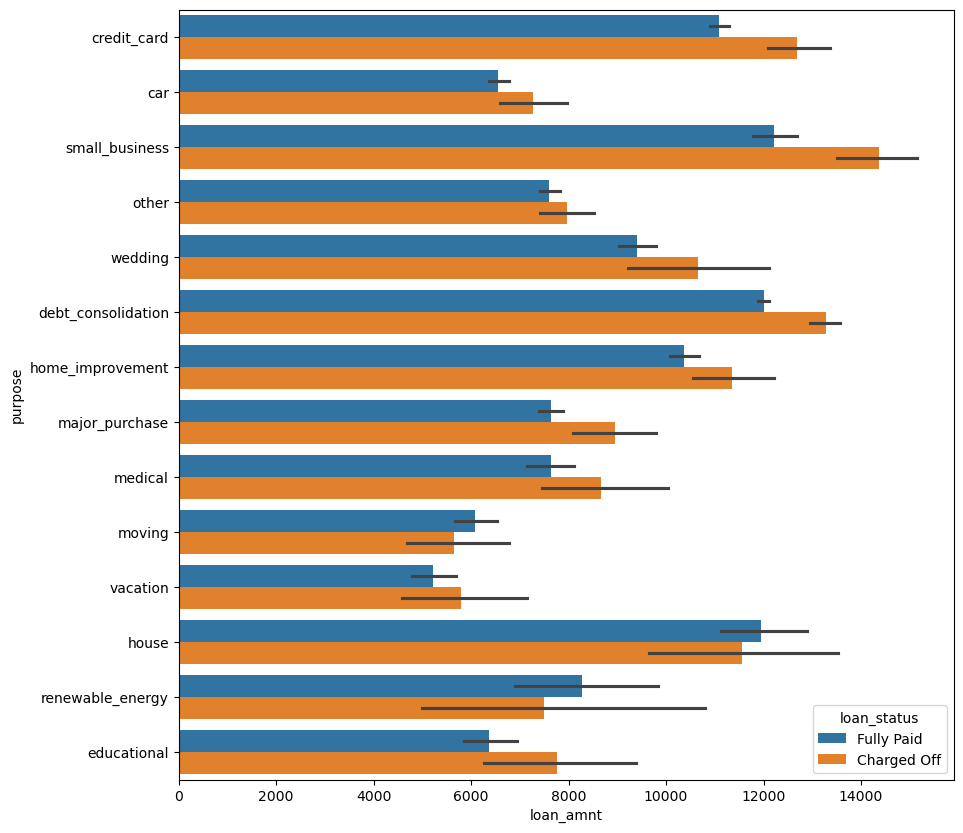

In [2746]:
#Analysing Loan Amount vs Loan Purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt', y='purpose', hue ='loan_status')
plt.show()

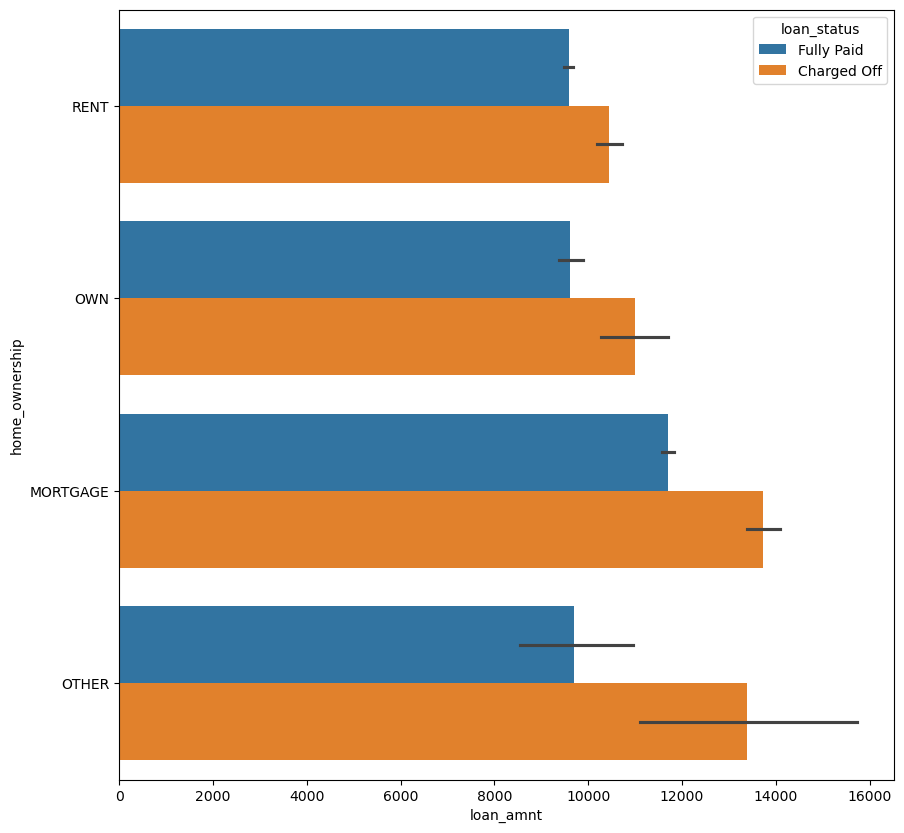

In [2748]:
#Anaysing Loam Amount vs Home Ownership
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt', y='home_ownership', hue ='loan_status')
plt.show()

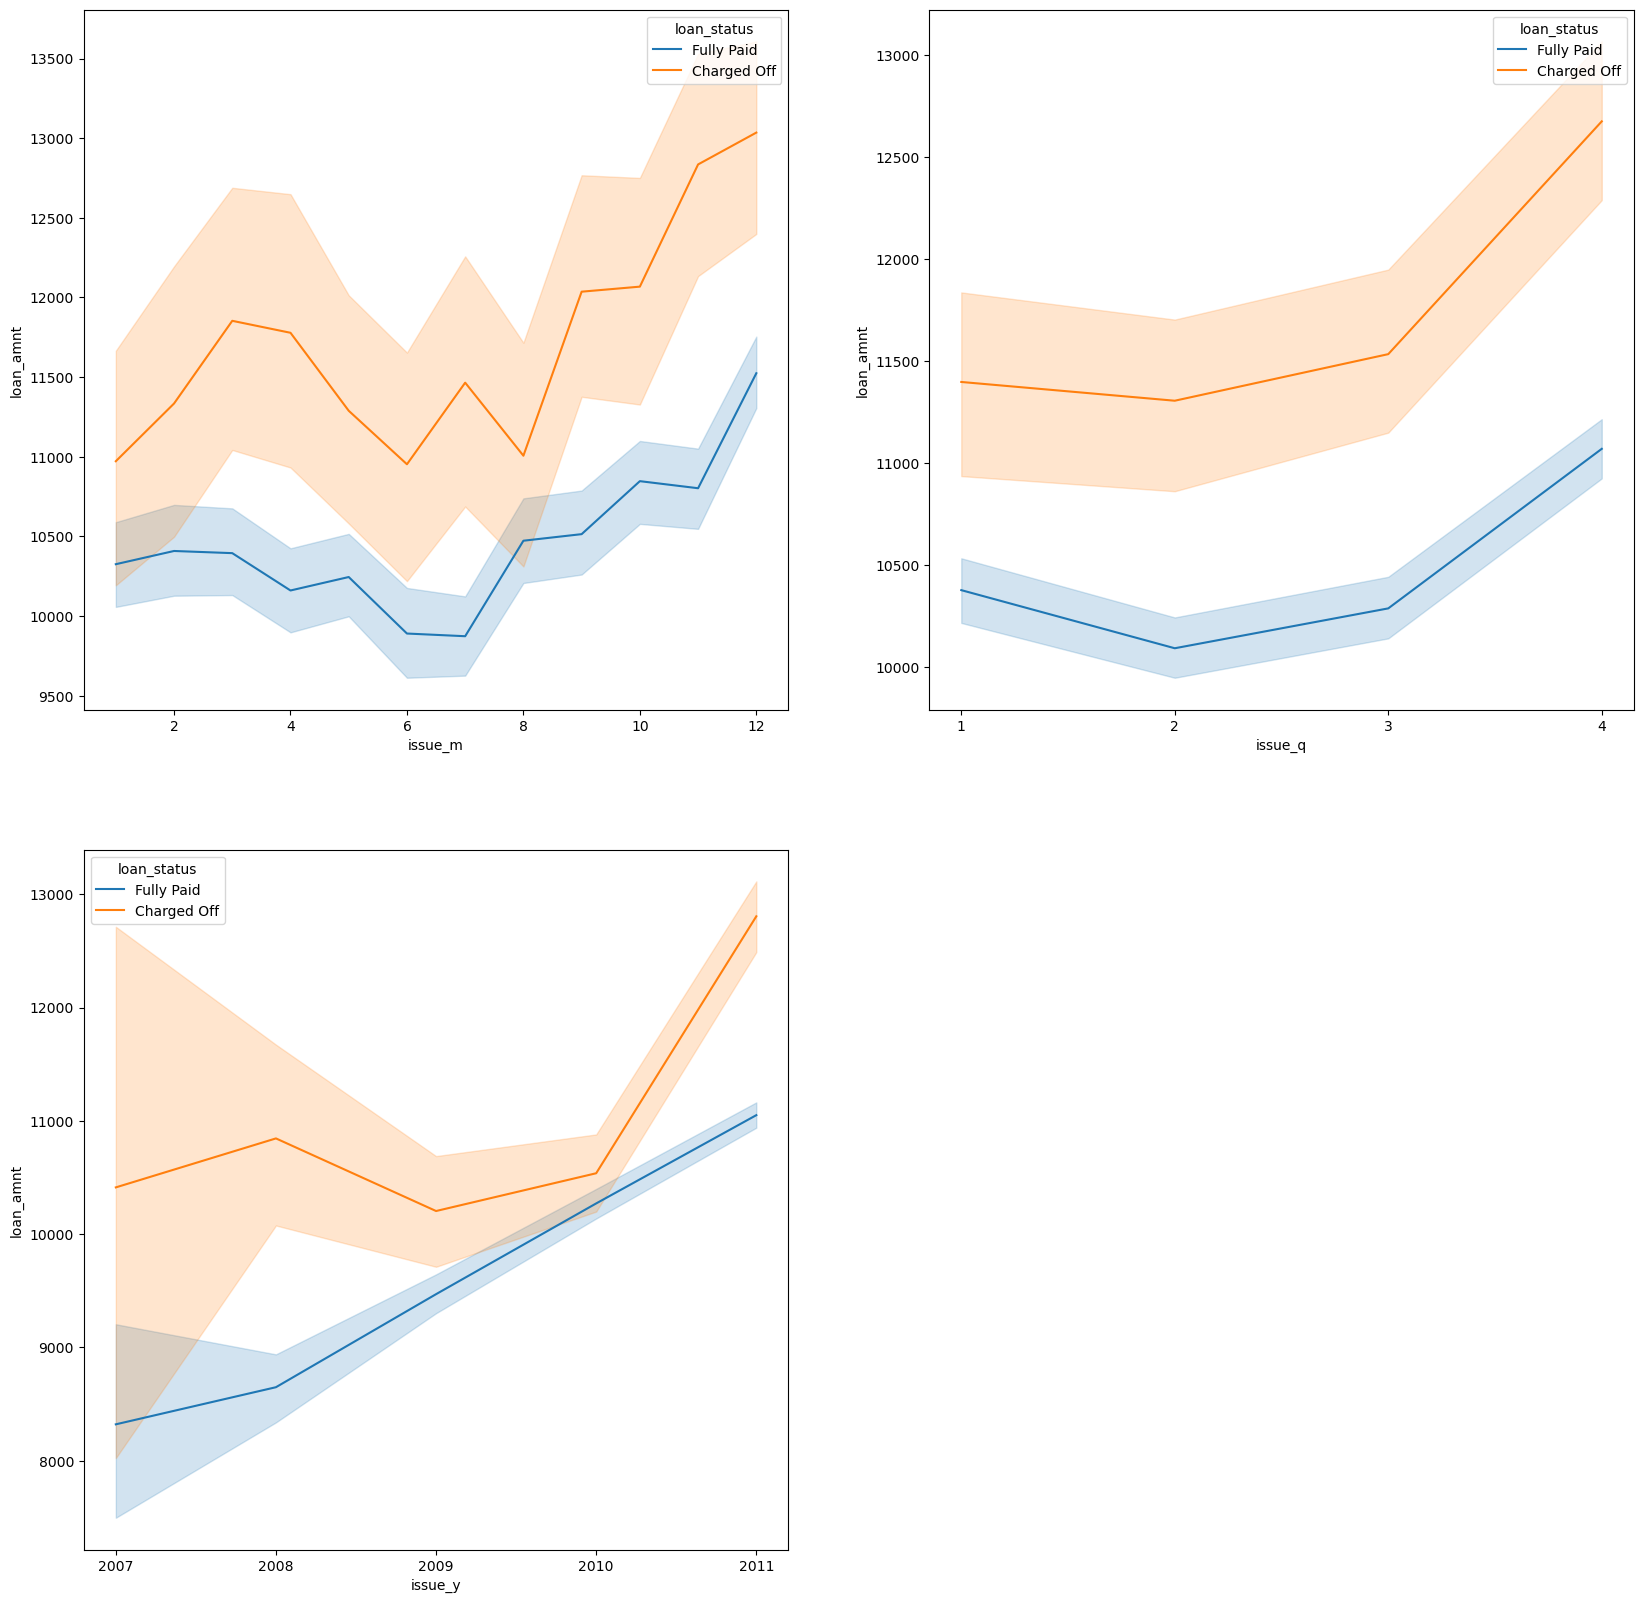

In [2751]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_df,y='loan_amnt', x='issue_m', hue ='loan_status')
plt.subplot(222)
sns.lineplot(data =loan_df,y='loan_amnt', x='issue_q', hue ='loan_status')
plt.xticks(sorted(loan_df['issue_q'].unique()))  
plt.subplot(223)
sns.lineplot(data =loan_df,y='loan_amnt', x='issue_y', hue ='loan_status')
plt.xticks(sorted(loan_df['issue_y'].unique())) 
plt.show()

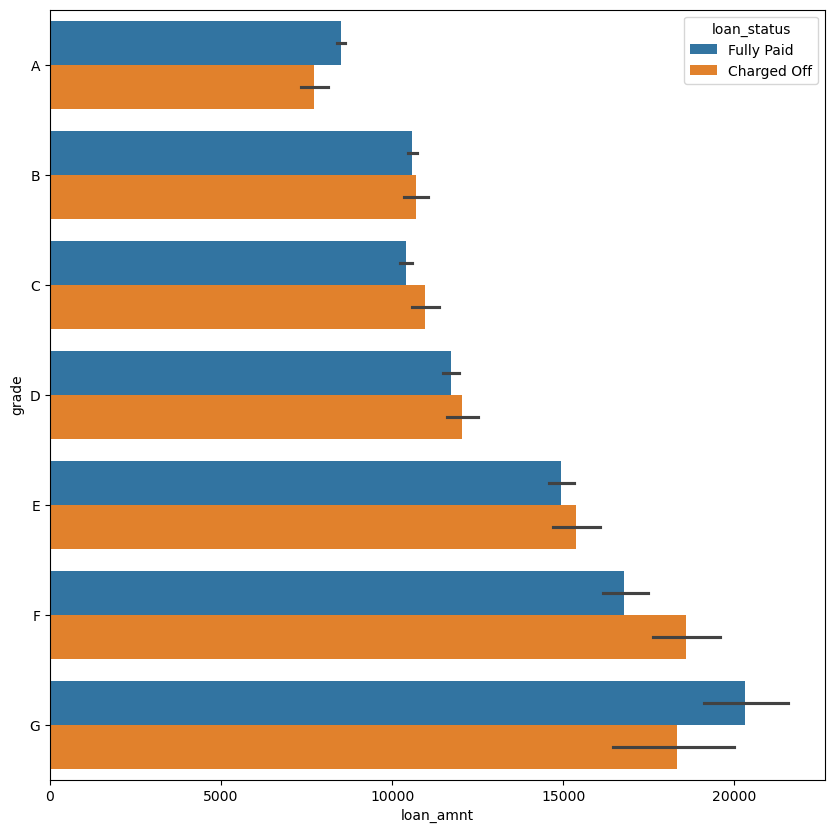

In [2753]:
#Loan Amount vs Grade
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

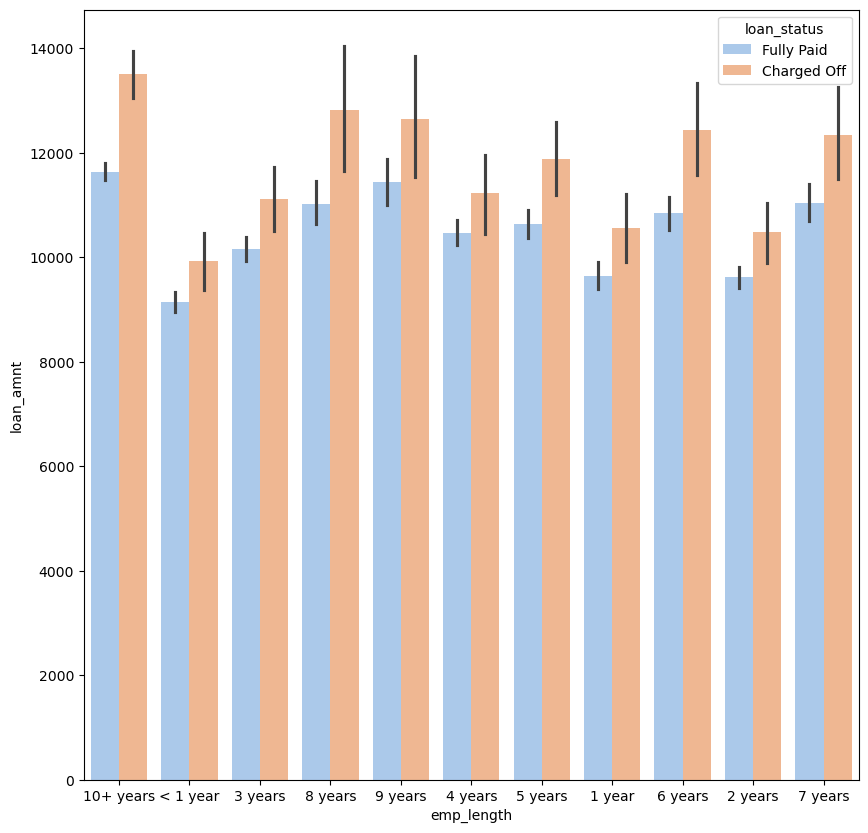

In [2755]:
#Analysing Loan Amount vs Employment Length and Verification Status 
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")


<Axes: xlabel='verification_status', ylabel='loan_amnt'>

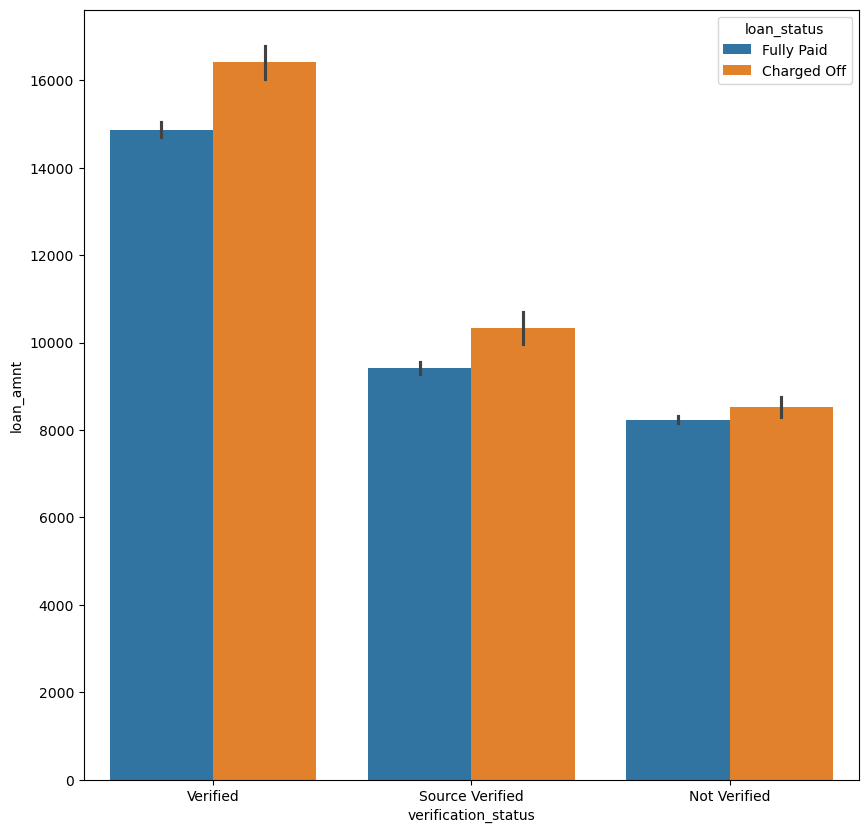

In [2757]:
#Analysing Loan Amount vs Verification Status
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,y='loan_amnt', x='verification_status', hue ='loan_status')

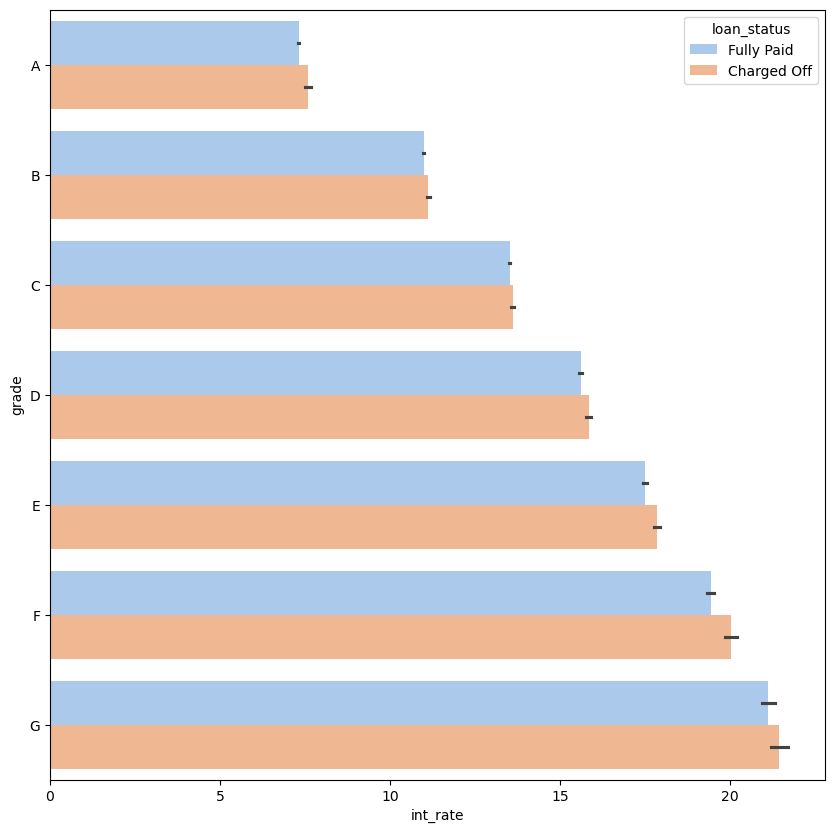

In [2759]:
#Analysing grade vs Interest Rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Axes: xlabel='loan_amnt_binned', ylabel='int_rate'>

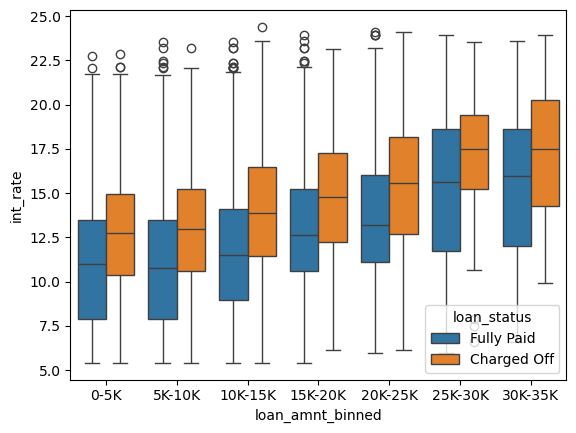

In [2760]:
#Analysing Interest Rates vs Loan Amount Binned
sns.boxplot(data =loan_df,y ='int_rate', x ='loan_amnt_binned',hue='loan_status')

### __5.Correlation Analysis__

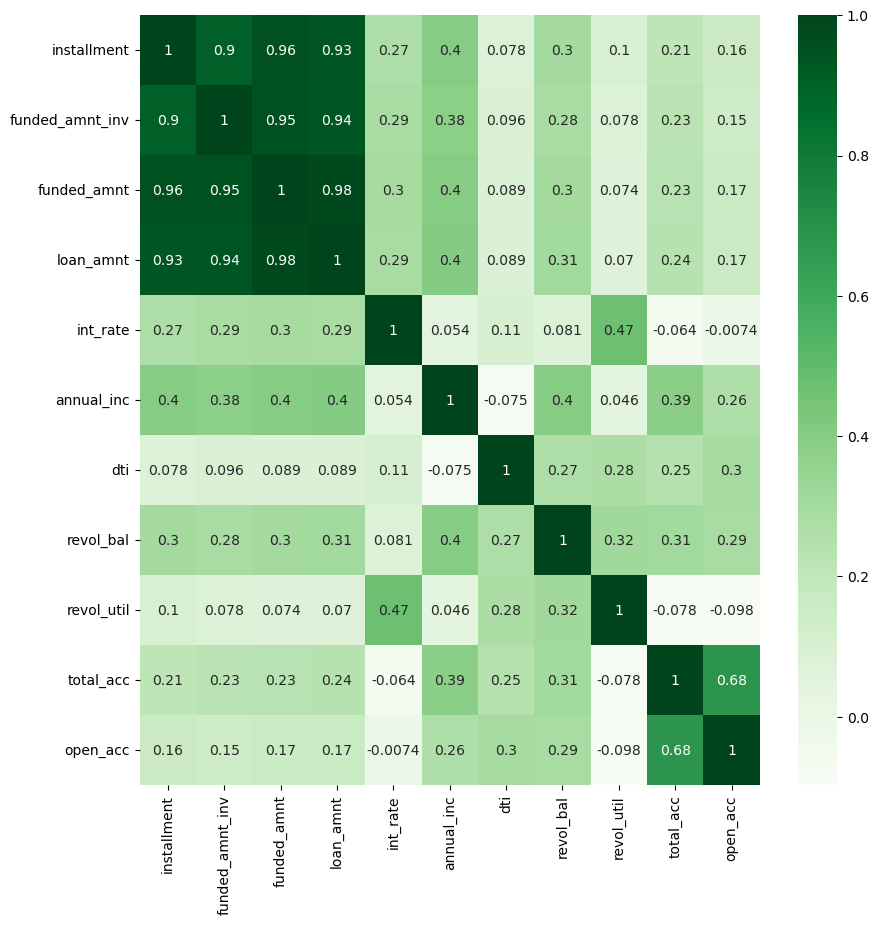

In [2763]:
correlation_df = loan_df[['installment','funded_amnt_inv','funded_amnt','loan_amnt','int_rate','annual_inc','dti','revol_bal','revol_util','total_acc','open_acc']]
corr = correlation_df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,cmap="Greens")
plt.show()

Inferences from Correlation Metrics

- installment has a strong positive correlation with funded_amnt, loan_amnt, and funded_amnt_inv
- total account and open account have strong positive correlation
- interest rate has weak correlation with most variables

### __6. Conclusions and Recommendations__
- Housing Status and Default Risk: Rented and Mortgaged houses are more likely to default. This fact needs to be taken into account when underwriting the loans and careful credit analysis and pricing should be done when extending such loans.
- Verification Status and Default Risk: Non-verified incomes are more likely to default. The lending company can invest more effort and resources in verifying the incomes effectively before extending the loans.
- Debt Consolidation Loan Default Risk: Debt consolidation loans are risky loans and more susceptible to default. The lending company should be cautious when approving loans for debt consolidation purpose and consider high pricing for the riskier loans.
- Geography and Default Risk:Loan applicants in California, Florida and New York are more likely to default. The lending company can implement stricter credit policies and adjust the pricing based on loan riskiness.
- Loan Term and Default Risk: Short term loans (term of 36 months) are more likely to default. The lending company should carefully evaluate the loans with shorter terms.
- Grade and Default Risk: Loans with B and C grades are seen to have more defaults. The lending company should re-evaluate their grading system or underlying models and provide worse grades to the loans that are more likely to default.
- Experience and Default Risk:Applicants with 10 + years of experience are more likely to default. Although, the total number of employees with 10+ years of experience is significantly higher than in other categories.But still, additional parameters should be considered when evaluating the credit-worthiness of a loan applicant.
- Seasonal Trends and Default Risk:There are more loan applications in December and Q4.Loans issued in this period are also seen to have higher defaults. Lending company should exercise rigorous credit worthiness analysis in this high peak season by developing their infrastructure and resource management.
- Lending Amount and Default Risk: Applicants with loan amount requests and funding of 5K-10K are more likely to default. The lending company should carefully analyse the loan applications with intermediate loan amount requests.
- DTI and Default Risk: High Debt to Income Ratio applicants are more likely to default. The lending company should incorporate this information when underwriting the loans and should appropriately price the loans for higher riskiness.
- Income and Default Risk: Income Bracket of 30K-60K are more likely to default. The lending company should carefully evaluate the credit worthiness of low-moderate income brackets for their repaying capacity when extending the loan.
- Credit History and Default Risk:Applicants with less credit history ( less open credit lines, total credit lines, revolving balance or low utilisation rates) are more likely to default. The lending company critically evaluate the loan applications with less or no credit history.